In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objects as go
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud



In [74]:
df = pd.read_csv(r".\Documentación\CSV\scimagojr 2023_1.csv", sep = "\t")
df = df.iloc[0:20000,:]
df

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2023),Total Docs. (3years),...,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,Areas
0,1,28773,Ca-A Cancer Journal for Clinicians,journal,"15424863, 00079235",106.09,Q1,211,49,124,...,35427,89,381.9,98.6,United States,Northern America,Wiley-Blackwell,1950-2023,Hematology (Q1); Oncology (Q1),Medicine
1,2,19300156903,Foundations and Trends in Machine Learning,journal,"19358245, 19358237",37.04,Q1,39,3,13,...,955,13,100.1,299.0,United States,Northern America,Now Publishers Inc,2008-2023,Artificial Intelligence (Q1); Human-Computer I...,Computer Science
2,3,20315,Nature Reviews Molecular Cell Biology,journal,"14710072, 14710080",35.91,Q1,508,123,336,...,13599,153,34.0,93.9,United Kingdom,Western Europe,Nature Publishing Group,2000-2023,Cell Biology (Q1); Molecular Biology (Q1),"Biochemistry, Genetics and Molecular Biology"
3,4,29431,Quarterly Journal of Economics,journal,"00335533, 15314650",30.45,Q1,306,47,136,...,2240,136,11.4,77.5,United Kingdom,Western Europe,Oxford University Press,1886-2023,Economics and Econometrics (Q1),"Economics, Econometrics and Finance"
4,5,12464,Nature Reviews Cancer,journal,"1474175X, 14741768",26.84,Q1,505,105,304,...,10951,163,31.3,102.0,United Kingdom,Western Europe,Nature Publishing Group,2001-2023,Cancer Research (Q1); Oncology (Q1),"Biochemistry, Genetics and Molecular Biology; ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,21101065070,Chemical Problems,journal,"25221655, 22218688",0.20,Q4,5,40,126,...,55,126,0.1,23.8,Azerbaijan,Eastern Europe,Institute of Catalysis and Inorganic Chemistry...,2019-2023,Chemistry (miscellaneous) (Q4),Chemistry
19996,19997,21101071897,CIAN-Revista de Historia de las Universidades,journal,"11396628, 19888503",0.20,Q1,3,16,42,...,11,41,0.5,36.3,Spain,Western Europe,Universidad Carlos III de Madrid,2019-2023,History (Q1); Education (Q4),Arts and Humanities; Social Sciences
19997,19998,19700190343,EDPACS,trade journal,"19361009, 07366981",0.20,Q3,14,33,53,...,42,53,0.0,21.1,United Kingdom,Western Europe,Taylor and Francis Ltd.,"1973-1997, 2003-2023",Safety Research (Q3); Computer Networks and Co...,Computer Science; Social Sciences
19998,19999,19900192534,Electronic Journal of Foreign Language Teaching,journal,2199874,0.20,Q2,15,6,67,...,36,60,0.9,56.0,Singapore,Asiatic Region,National University of Singapore,2011-2023,Linguistics and Language (Q2); Education (Q4),Social Sciences


In [75]:
df = df.drop('Issn', axis=1)


In [76]:
df_h = df.loc[df.loc[:,"H index"].sort_values(ascending=False).index]

In [77]:
df_h

,Rank,Sourceid,Title,Type,SJR,SJR Best Quartile,H index,Total Docs. (2023),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,Areas
16,17,21206,Nature,journal,18.51,Q1,1391,3770,8037,74917,160102,3840,19.0,19.7,United Kingdom,Western Europe,Nature Research,1869-2023,Multidisciplinary (Q1),Multidisciplinary
55,56,23571,Science,journal,11.90,Q1,1336,2181,8261,42348,117779,4229,13.6,19.2,United States,Northern America,American Association for the Advancement of Sc...,"1880-1881, 1883-2023",History and Philosophy of Science (Q1); Multid...,Arts and Humanities; Multidisciplinary
10,11,15847,New England Journal of Medicine,journal,20.54,Q1,1184,1388,4522,14603,107246,1824,21.9,10.2,United States,Northern America,Massachussetts Medical Society,1945-2023,Medicine (miscellaneous) (Q1),Medicine
54,55,16590,"Lancet, The",journal,12.11,Q1,895,1398,4046,22192,65313,1370,14.5,15.7,United Kingdom,Western Europe,Elsevier B.V.,1823-2023,Medicine (miscellaneous) (Q1),Medicine
5,6,18434,Cell,journal,24.34,Q1,892,439,1496,32820,53447,1207,31.0,74.6,United States,Northern America,Elsevier B.V.,1974-2023,"Biochemistry, Genetics and Molecular Biology (...","Biochemistry, Genetics and Molecular Biology"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19380,19381,21100932743,Pharmaceutical Technology in Hospital Pharmacy,journal,0.21,Q2,1,0,2,0,4,2,0.0,0.0,Germany,Western Europe,Walter de Gruyter GmbH,2019-2023,Pharmacy (Q2); Pharmacology (medical) (Q3); Ph...,"Health Professions; Medicine; Pharmacology, To..."
17338,17339,21101037327,Noctua,journal,0.26,Q1,1,17,34,1339,9,31,0.2,78.6,Italy,Western Europe,E-theca OnLineOpenAccess Edizioni,2019-2023,History (Q1); Arts and Humanities (miscellaneo...,Arts and Humanities
10484,10485,21101042996,Translational Science of Rare Diseases,journal,0.52,Q3,1,8,8,379,18,7,0.0,47.8,Netherlands,Western Europe,IOS Press BV,"2020, 2022-2023",Medicine (miscellaneous) (Q3),Medicine
15321,15322,21101052927,Microphysiological Systems,journal,0.31,Q3,1,0,1,0,1,1,1.0,0.0,China,Asiatic Region,AME Publishing Company,2021,Biomedical Engineering (Q3); Physiology (medic...,"Biochemistry, Genetics and Molecular Biology; ..."


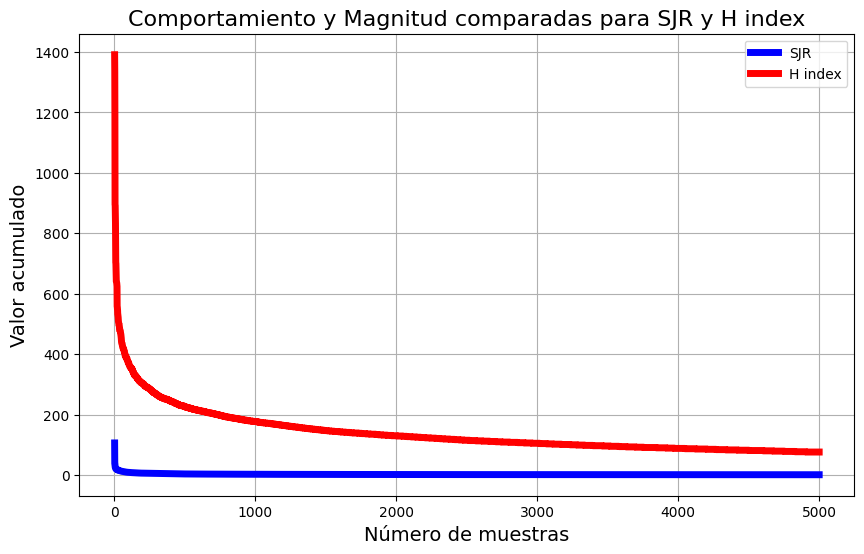

In [78]:
""" comportamiento y magnitud comparativa enter SJR y H index ambos organizados"""

# Generar 5000 muestras de valores para la primera variable
muestras = 5000
valores_1 = df.loc[:,"SJR"][0:5000]

# Generar 5000 muestras de valores para la segunda variable
valores_2 = df_h.loc[:,"H index"][0:5000]

# Crear una lista de índices para las muestras
indices = np.arange(1, muestras + 1)

# Crear el gráfico de línea con ambas variables
plt.figure(figsize=(10, 6))
plt.plot(indices, valores_1, color='blue', linewidth=5, label='SJR')
plt.plot(indices, valores_2, color='red', linewidth=5, label='H index')

# Título y etiquetas de los ejes
plt.title('Comportamiento y Magnitud comparadas para SJR y H index', fontsize=16)
plt.xlabel('Número de muestras', fontsize=14)
plt.ylabel('Valor acumulado', fontsize=14)

plt.grid(True)  # Agregar cuadrícula al gráfico
plt.legend()    # Mostrar la leyenda
plt.show()


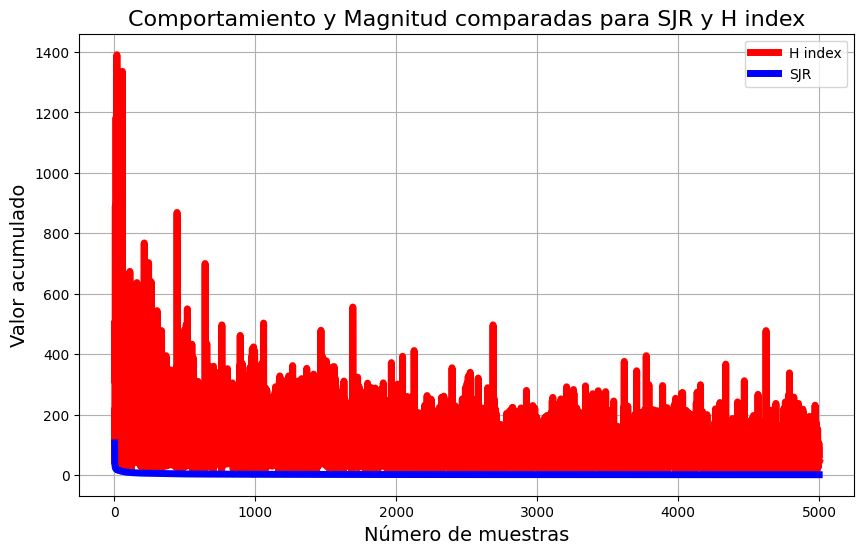

In [79]:
""" comportamiento y magnitud comparativa enter SJR y H index, ambos en base a ranking SJR"""

# Generar 5000 muestras de valores para la primera variable
muestras = 5000
valores_1 = df.loc[:,"SJR"][0:5000]

# Generar 5000 muestras de valores para la segunda variable
valores_2 = df.loc[:,"H index"][0:5000]

# Crear una lista de índices para las muestras
indices = np.arange(1, muestras + 1)

# Crear el gráfico de línea con ambas variables
plt.figure(figsize=(10, 6))
plt.plot(indices, valores_2, color='red', linewidth=5, label='H index')

plt.plot(indices, valores_1, color='blue', linewidth=5, label='SJR')

# Título y etiquetas de los ejes
plt.title('Comportamiento y Magnitud comparadas para SJR y H index', fontsize=16)
plt.xlabel('Número de muestras', fontsize=14)
plt.ylabel('Valor acumulado', fontsize=14)

plt.grid(True)  # Agregar cuadrícula al gráfico
plt.legend()    # Mostrar la leyenda
plt.show()


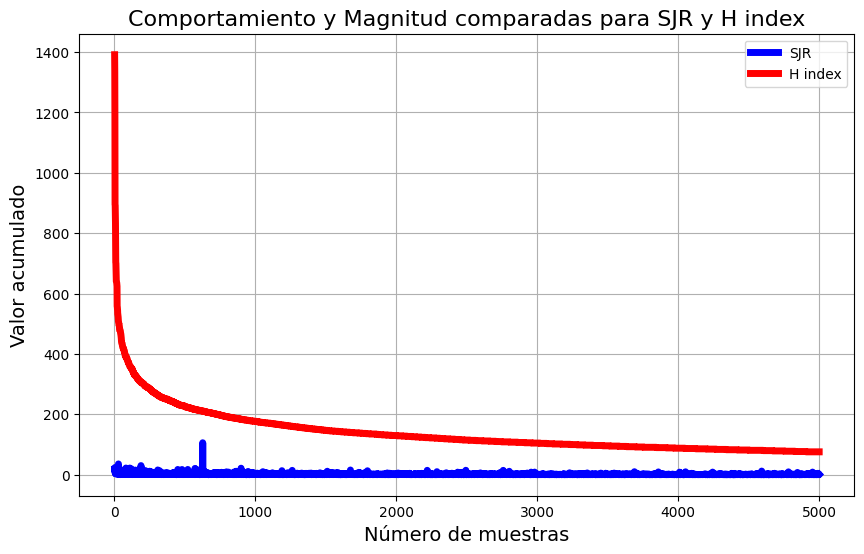

In [80]:
""" comportamiento y magnitud comparativa enter SJR y H index, ambos en base a ranking H index"""

# Generar 5000 muestras de valores para la primera variable
muestras = 5000
valores_1 = df_h.loc[:,"SJR"][0:5000]

# Generar 5000 muestras de valores para la segunda variable
valores_2 = df_h.loc[:,"H index"][0:5000]

# Crear una lista de índices para las muestras
indices = np.arange(1, muestras + 1)

# Crear el gráfico de línea con ambas variables
plt.figure(figsize=(10, 6))
plt.plot(indices, valores_1, color='blue', linewidth=5, label='SJR')
plt.plot(indices, valores_2, color='red', linewidth=5, label='H index')

# Título y etiquetas de los ejes
plt.title('Comportamiento y Magnitud comparadas para SJR y H index', fontsize=16)
plt.xlabel('Número de muestras', fontsize=14)
plt.ylabel('Valor acumulado', fontsize=14)

plt.grid(True)  # Agregar cuadrícula al gráfico
plt.legend()    # Mostrar la leyenda
plt.show()


In [81]:
dfQ = df.groupby("SJR Best Quartile")[["SJR","H index"]].mean()
dfQ["SJR"].to_dict().values()

dict_values([0.8038842975206612, 1.4828274231678487, 0.521991627757205, 0.31132957990472065, 0.22730508474576275])

In [82]:
dfQ

,SJR,H index
SJR Best Quartile,,
-,0.803884,77.925620
Q1,1.482827,86.708983
Q2,0.521992,47.429560
Q3,0.311330,29.708315
Q4,0.227305,21.910169


In [83]:
dfQ["SJR"][1:]

SJR Best Quartile
Q1    1.482827
Q2    0.521992
Q3    0.311330
Q4    0.227305
Name: SJR, dtype: float64

In [84]:
df["SJR Best Quartile"].value_counts().to_dict()

{'Q1': 8460, 'Q2': 6211, 'Q3': 4618, 'Q4': 590, '-': 121}

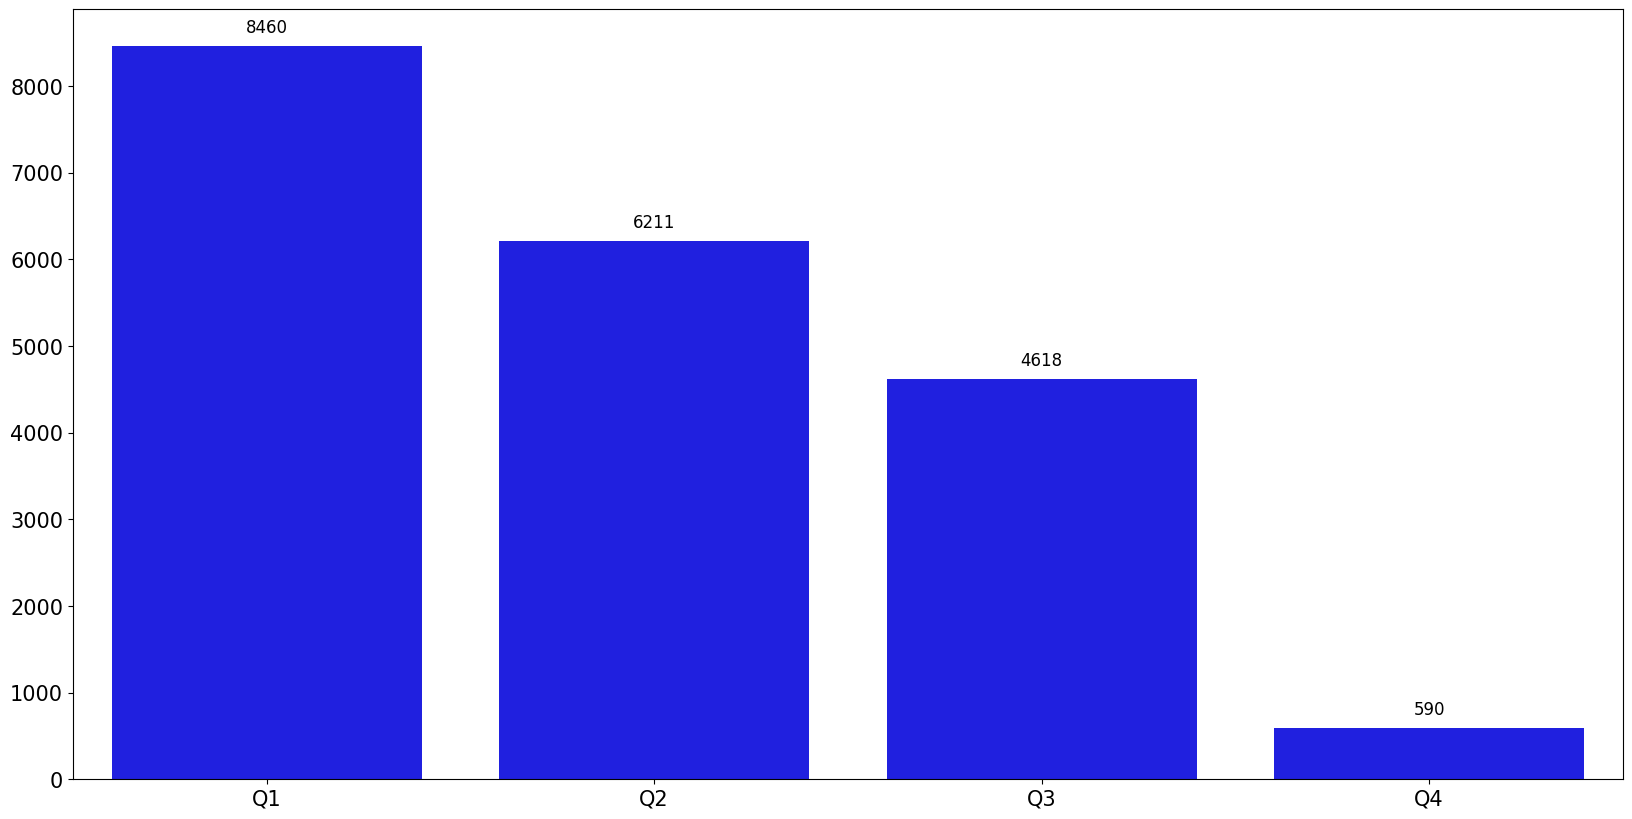

In [85]:
'''Gráfico de barras mostrando cantidad de publicaciones recogidas en base al quartil, eliminando aquellas sin cuartil'''
# incluir la media de SJR y H index por cuartil

# Resultados
sjr_results = {
    'Q1': 8460,
    'Q2': 6211,
    'Q3': 4618,
    'Q4': 590,
    # '-': 121
}


# Crear el gráfico de barras
plt.figure(figsize=(20, 10))

barplot = sns.barplot(x=list(sjr_results.keys()), y=list(sjr_results.values()), color='blue')

# Añadir etiquetas en la parte superior y central de cada columna
for index, value in enumerate(sjr_results.values()):
    barplot.annotate(str(value), xy=(index, value), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=12)

# Ajustar el tamaño y la inclinación del texto del eje x
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.show()


In [86]:
dfQ["SJR"][1:].to_dict().values()

dict_values([1.4828274231678487, 0.521991627757205, 0.31132957990472065, 0.22730508474576275])

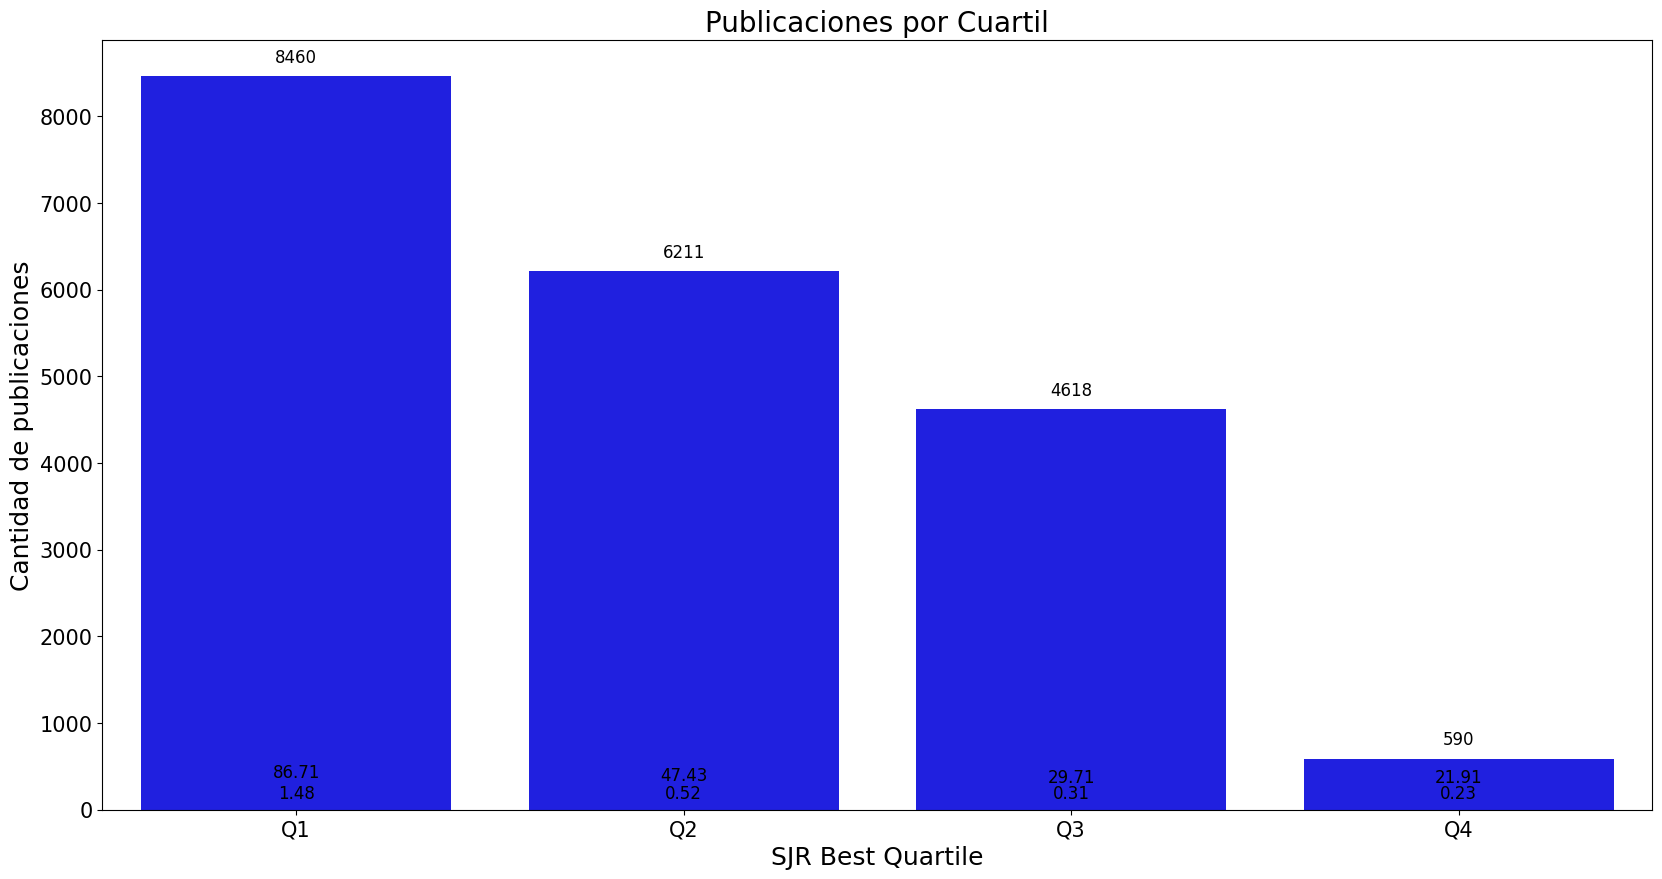

In [87]:
'''Gráfico de barras mostrando cantidad de publicaciones recogidas en base al quartil'''
# incluir la media de SJR y H index por cuartil

# Resultados
sjr_results = {
    'Q1': 8460,
    'Q2': 6211,
    'Q3': 4618,
    'Q4': 590,
    # '-': 121
}

# Crear el gráfico de barras
plt.figure(figsize=(20, 10))

barplot = sns.barplot(x=list(sjr_results.keys()), y=list(sjr_results.values()), color='blue')

# Añadir etiquetas en la parte superior y central de cada columna
for index, value in enumerate(sjr_results.values()):
    barplot.annotate(str(value), xy=(index, value), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=12)

for index, value in enumerate(dfQ["SJR"][1:].to_dict().values()):
    barplot.annotate(str(round(value,2)), xy=(index, value), xytext=(0, 8), textcoords='offset points', ha='center', fontsize=12)
for index, value in enumerate(dfQ["H index"][1:].to_dict().values()):
    barplot.annotate(str(round(value,2)), xy=(index, value), xytext=(0, 18), textcoords='offset points', ha='center', fontsize=12)

# Ajustar el tamaño y la inclinación del texto del eje x
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Etiquetas del eje x y y
plt.xlabel("SJR Best Quartile", fontsize=18)
plt.ylabel("Cantidad de publicaciones", fontsize=18)

# Título
plt.title("Publicaciones por Cuartil", fontsize=20)


# plt.tight_layout()  # Ajuste automático de diseño

plt.show()


In [88]:
dfQ["SJR"][1:].to_dict().values()

dict_values([1.4828274231678487, 0.521991627757205, 0.31132957990472065, 0.22730508474576275])

In [89]:
dfQ["H index"][1:].to_dict().values()

dict_values([86.70898345153664, 47.42956045725326, 29.708315288003465, 21.910169491525423])

C:\Users\Victor\AppData\Local\Temp\ipykernel_26020\1072363622.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=list(sjr_results.keys()), y=list(sjr_results.values()), palette=colores)


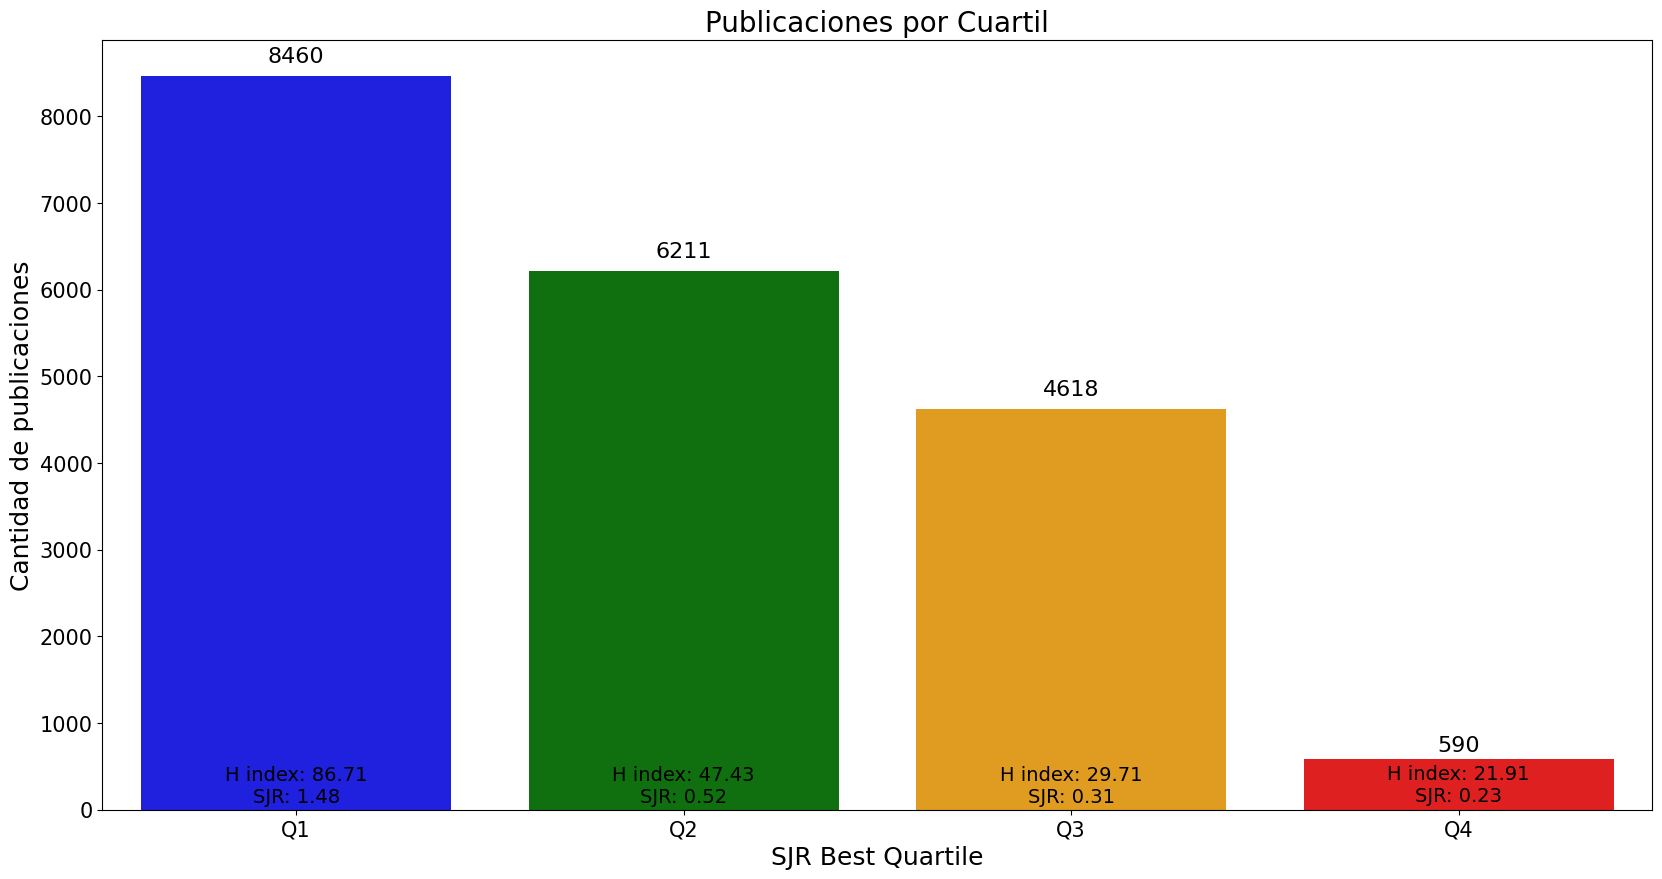

In [90]:

# Resultados
sjr_results = {
    'Q1': 8460,
    'Q2': 6211,
    'Q3': 4618,
    'Q4': 590,

}

# Valores de H index por cuartil
h_index_values = {
    'Q1': 86.71,
    'Q2': 47.43,
    'Q3': 29.71,
    'Q4': 21.91,

}

# Valores de SJR por cuartil
sjr_values = {
    'Q1': 1.48,
    'Q2': 0.52,
    'Q3': 0.31,
    'Q4': 0.23,

}

# Crear el gráfico de barras
plt.figure(figsize=(20, 10))

# Lista de colores para las barras
colores = ['blue', 'green', 'orange', 'red']

barplot = sns.barplot(x=list(sjr_results.keys()), y=list(sjr_results.values()), palette=colores)

# Añadir etiquetas dentro de las barras con valores de H index y SJR
for index, value in enumerate(sjr_results.values()):
    if index != 3:
        barplot.annotate(f'{value}', 
                          xy=(index, value), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=16)
        barplot.annotate(f'H index: {h_index_values[list(sjr_results.keys())[index]]}\nSJR: {round(sjr_values[list(sjr_results.keys())[index]], 2)}', 
                          xy=(index, value-(value-400)), xytext=(0, -20), textcoords='offset points', ha='center', fontsize=14, color='black')
    else:
        barplot.annotate(f'{value}', 
                          xy=(index, value), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=16)
        barplot.annotate(f'H index: {h_index_values[list(sjr_results.keys())[index]]}\nSJR: {round(sjr_values[list(sjr_results.keys())[index]], 2)}', 
                          xy=(index, value/1.2), xytext=(0, -25), textcoords='offset points', ha='center', fontsize=14, color='black')

# Ajustar el tamaño y la inclinación del texto del eje x
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Etiquetas del eje x y y
plt.xlabel("SJR Best Quartile", fontsize=18)
plt.ylabel("Cantidad de publicaciones", fontsize=18)

# Título
plt.title("Publicaciones por Cuartil", fontsize=20)

plt.show()


In [91]:
dfQ = df.groupby("SJR Best Quartile")[["SJR","H index"]].mean()
dfQ = dfQ[1:]
dfQ["SJR"].to_dict().values()

dict_values([1.4828274231678487, 0.521991627757205, 0.31132957990472065, 0.22730508474576275])

In [92]:
dfQ["SJR"]

SJR Best Quartile
Q1    1.482827
Q2    0.521992
Q3    0.311330
Q4    0.227305
Name: SJR, dtype: float64

In [93]:
dfQ1 = df.loc[df.loc[:,"SJR Best Quartile"]=="Q1",:]
dfQ1.groupby()

TypeError: You have to supply one of 'by' and 'level'

In [94]:
""" media de SJR y H index por país TOP 10 Publicaciones"""

dfCM = df.groupby("Country")[["SJR","H index"]].mean()
dfCM10 = dfCM.loc[["United States","United Kingdom","Netherlands","Germany","Switzerland","China","Spain","Poland","India","Russian Federation"],:]
dfCM10


,SJR,H index
Country,,
United States,1.141996,77.942883
United Kingdom,1.029414,68.782091
Netherlands,0.974615,74.855311
Germany,0.729176,55.304977
Switzerland,0.740485,47.336927
China,0.783269,31.216783
Spain,0.385424,19.560606
Poland,0.350629,22.150350
India,0.365949,31.941606


In [95]:
states = ["United States","United Kingdom","Netherlands","Germany","Switzerland","China","Spain","Poland","India","Russian Federation"]

In [96]:
dfCM10

,SJR,H index
Country,,
United States,1.141996,77.942883
United Kingdom,1.029414,68.782091
Netherlands,0.974615,74.855311
Germany,0.729176,55.304977
Switzerland,0.740485,47.336927
China,0.783269,31.216783
Spain,0.385424,19.560606
Poland,0.350629,22.150350
India,0.365949,31.941606


In [97]:
dfCM10["SJR"].to_list()

[1.1419963963963964,
 1.0294140267350302,
 0.9746153846153847,
 0.7291764705882353,
 0.7404851752021564,
 0.7832692307692308,
 0.3854242424242424,
 0.3506293706293706,
 0.365948905109489,
 0.30366412213740457]

In [98]:
dfCM1 = dfCM10["H index"]/10
dfCM1.to_list()

[7.794288288288288,
 6.878209119208937,
 7.485531135531136,
 5.530497737556561,
 4.733692722371968,
 3.1216783216783215,
 1.9560606060606063,
 2.215034965034965,
 3.194160583941606,
 1.1835877862595419]

C:\Users\Victor\AppData\Local\Temp\ipykernel_26020\3600393919.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=states,
C:\Users\Victor\AppData\Local\Temp\ipykernel_26020\3600393919.py:9: UserWarning: The palette list has more values (100) than needed (10), which may not be intended.
  barplot = sns.barplot(x=states,
C:\Users\Victor\AppData\Local\Temp\ipykernel_26020\3600393919.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=states,


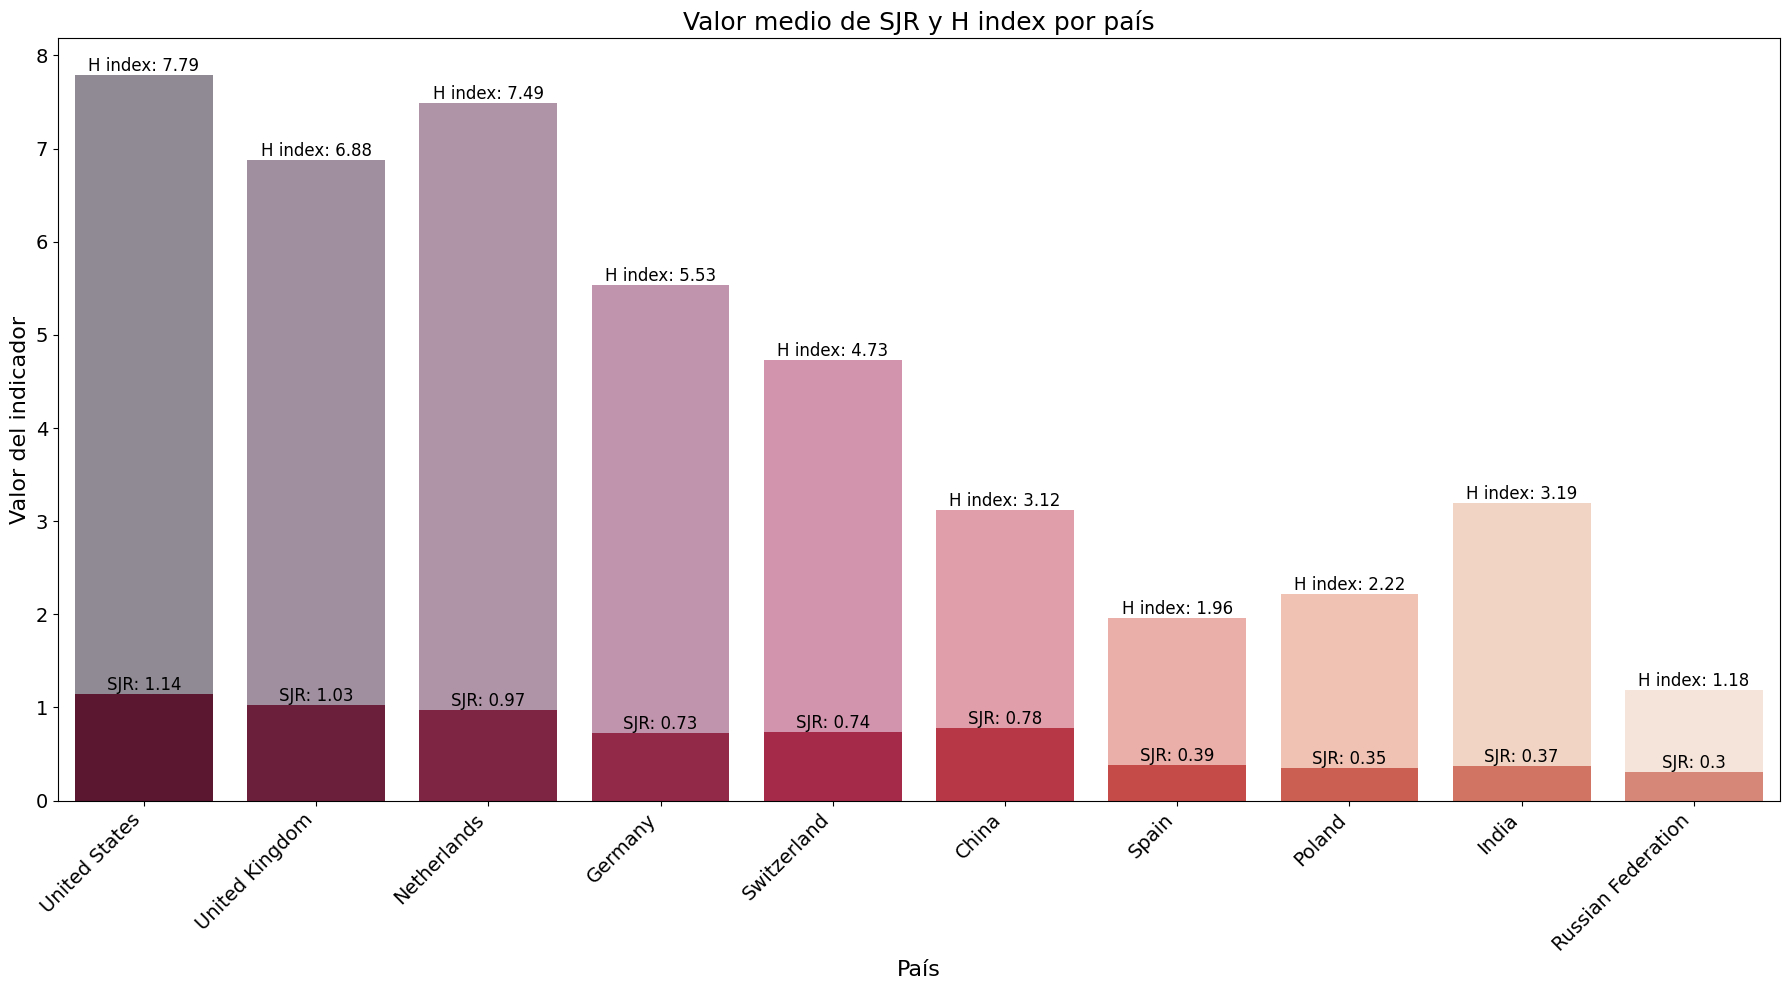

In [99]:
# Crear el gráfico de barras
plt.figure(figsize=(18,10))  

# Colores 
colors1 = sns.color_palette("RdYlBu", 100)
colors2 = sns.color_palette("rocket", 10)


barplot = sns.barplot(x=states,
                      y=dfCM10["SJR"].to_list(),
                      palette=colors1)

barplot = sns.barplot(x=states,
                      y=dfCM1.to_list(),
                      palette=colors2,
                      alpha = 0.5)

# Añadir etiquetas en la parte superior de cada columna
for index, value in enumerate(dfCM10["SJR"].to_list()):
    barplot.text(index, value, f'SJR: {str(round(value,2))}', ha='center', fontsize=12, va='bottom')

# Añadir etiquetas en la parte superior de cada columna
for index, value in enumerate(dfCM1.to_list()):
    barplot.text(index, value, f'H index: {str(round(value,2))}', ha='center', fontsize=12, va='bottom')

# Ajustar el tamaño y la inclinación del texto del eje x y y
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Etiquetas del eje x y y
plt.xlabel("País", fontsize=16)
plt.ylabel("Valor del indicador", fontsize=16)

# Título
plt.title("Valor medio de SJR y H index por país", fontsize=18)

plt.tight_layout()  # Ajuste automático de diseño
plt.show()


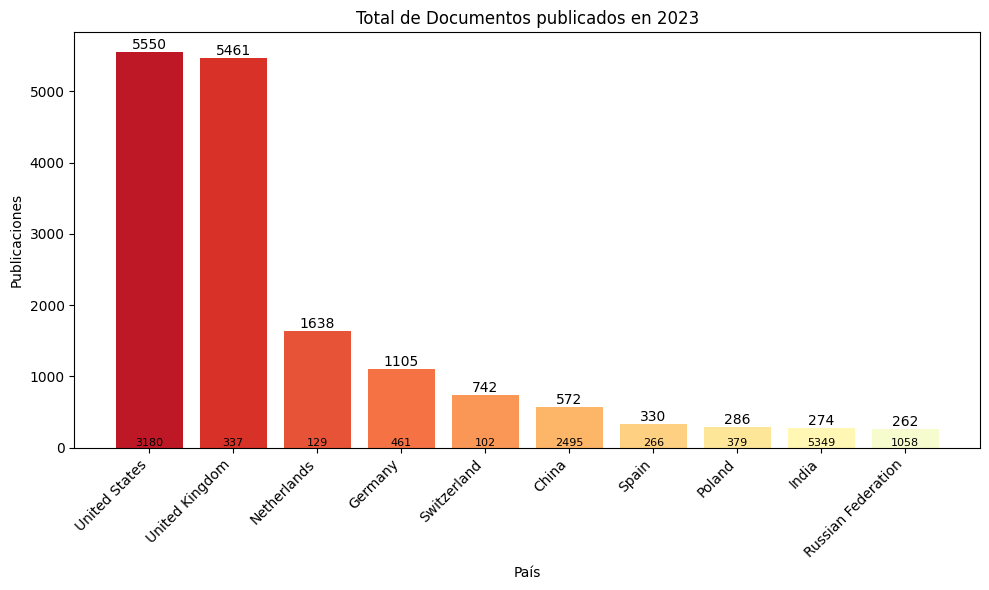

In [100]:
# Valores y países
countries = ['United States', 'United Kingdom','Netherlands', 'Germany','Switzerland','China','Spain','Poland', 'India', 'Russian Federation']
values = [5550, 5461, 1638, 1105, 742, 572, 330, 286, 274, 262]
uxc2023 = [3180,337,129,461,102,2495,266,379,5349,1058]
# Crear la paleta de colores
colors = sns.color_palette("RdYlBu", 18)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(countries, values, color=colors[:len(countries)])

# Altura fija para los textos de uxc3y
text_height = min(values) * 0.1

# Añadir etiquetas de valor en cada barra
for i in range(len(countries)):
    plt.text(bars[i].get_x() + bars[i].get_width() / 2, bars[i].get_height(), str(values[i]), ha='center', va='bottom')

# Añadir valor de uxc3y dentro de cada barra
for i in range(len(countries)):
    plt.text(bars[i].get_x() + bars[i].get_width() / 2, text_height, str(uxc2023[i]), ha='center', fontsize=8, color='black')

# Ajustes de la gráfica
plt.xlabel('País')
plt.ylabel('Publicaciones')
plt.title('Total de Documentos publicados en 2023')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



In [101]:
""" Datos obtenidos de consutlar https://www.flagpictures.com/countries/number-of-universities/ """
uxc3y = [3180,337,102,129,461,2495,5349,625,992,1264]

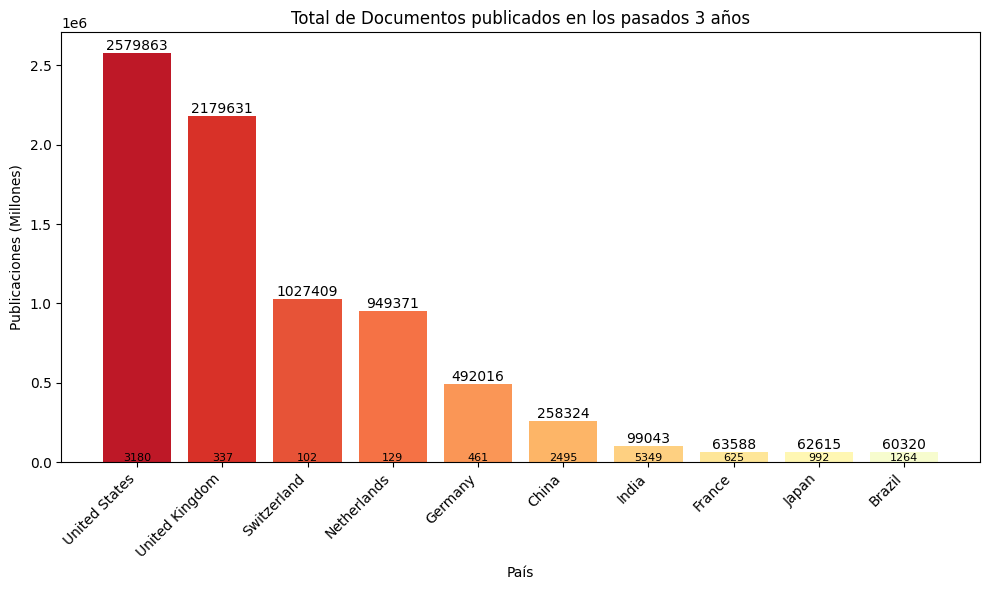

In [102]:

# Valores y países
countries = ['United States', 'United Kingdom', 'Switzerland', 'Netherlands', 'Germany', 'China', 'India', 'France', 'Japan', 'Brazil']
values = [2579863, 2179631, 1027409, 949371, 492016, 258324, 99043, 63588, 62615, 60320]
uxc3y = [3180, 337, 102, 129, 461, 2495, 5349, 625, 992, 1264]

# Crear la paleta de colores
colors = sns.color_palette("RdYlBu", 18)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(countries, values, color=colors[:len(countries)])

# Altura fija para los textos de uxc3y
text_height = min(values) * 0.1

# Añadir etiquetas de valor en cada barra
for i in range(len(countries)):
    plt.text(bars[i].get_x() + bars[i].get_width() / 2, bars[i].get_height(), str(values[i]), ha='center', va='bottom')

# Añadir valor de uxc3y dentro de cada barra
for i in range(len(countries)):
    plt.text(bars[i].get_x() + bars[i].get_width() / 2, text_height, str(uxc3y[i]), ha='center', fontsize=8, color='black')

# Ajustes de la gráfica
plt.xlabel('País')
plt.ylabel('Publicaciones (Millones)')
plt.title('Total de Documentos publicados en los pasados 3 años')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



In [103]:
df_100 = df.iloc[0:101,:]

In [104]:
df_100_h = df_100.loc[df_100.loc[:,"H index"].sort_values(ascending=False).index]

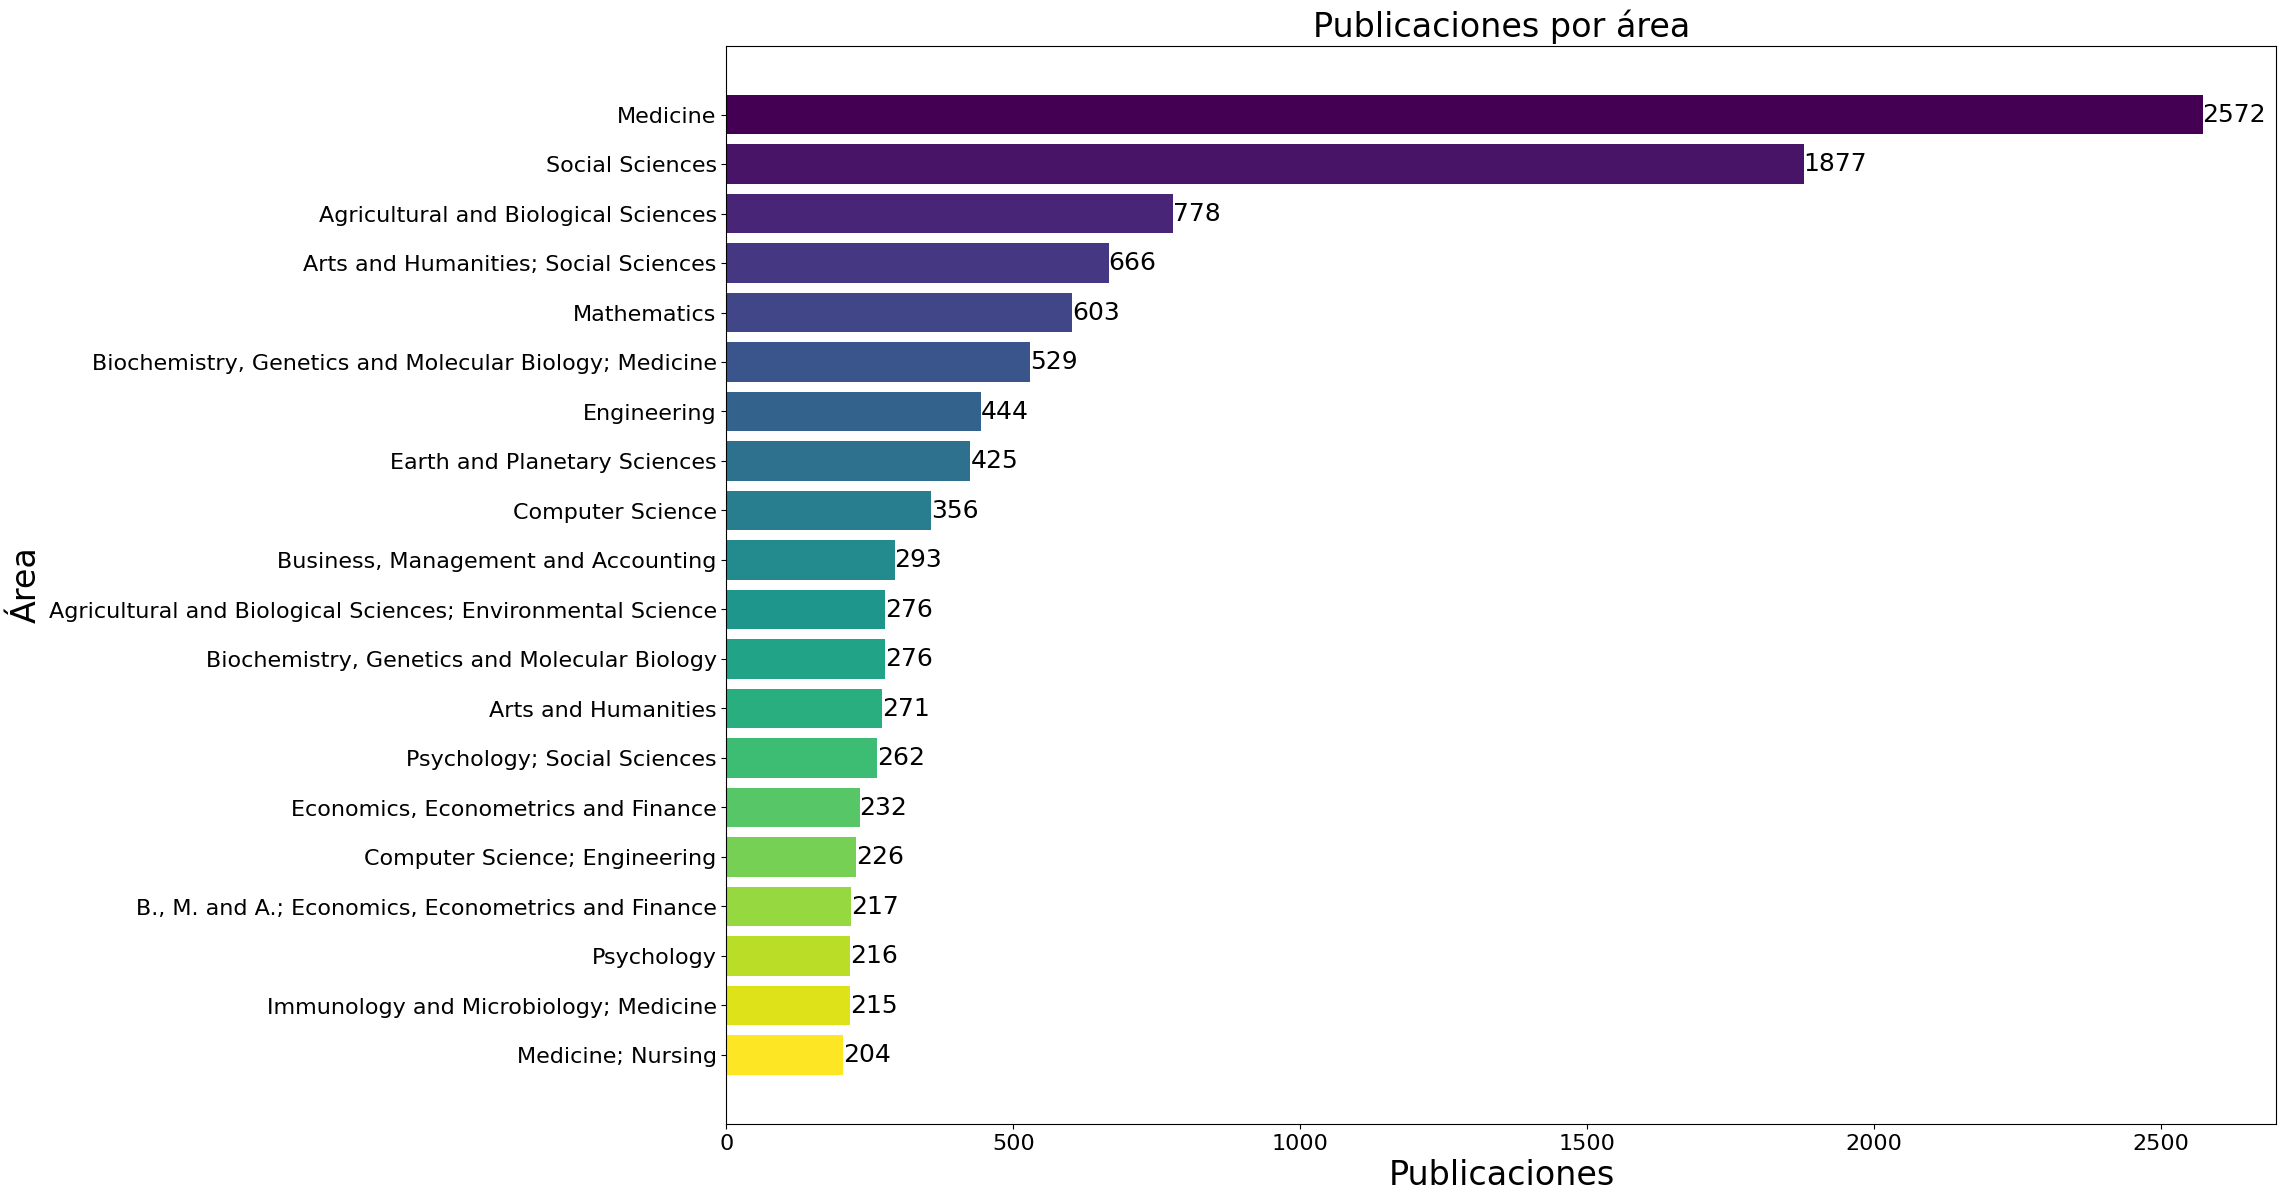

In [106]:


# Valores y etiquetas de las áreas
areas = ['Medicine', 'Social Sciences', 'Agricultural and Biological Sciences',
         'Arts and Humanities; Social Sciences', 'Mathematics',
         'Biochemistry, Genetics and Molecular Biology; Medicine', 'Engineering',
         'Earth and Planetary Sciences', 'Computer Science',
         'Business, Management and Accounting',
         'Agricultural and Biological Sciences; Environmental Science',
         'Biochemistry, Genetics and Molecular Biology', 'Arts and Humanities',
         'Psychology; Social Sciences', 'Economics, Econometrics and Finance',
         'Computer Science; Engineering',
         'B., M. and A.; Economics, Econometrics and Finance',
         'Psychology', 'Immunology and Microbiology; Medicine', 'Medicine; Nursing']

values = [2572, 1877, 778, 666, 603, 529, 444, 425, 356, 293, 276, 276, 271, 262, 232, 226, 217, 216, 215, 204]

# Colores de degradado de amarillo a granate
colors = plt.cm.viridis(np.linspace(0, 1, len(areas)))

# Crear la gráfica de barras horizontales
plt.figure(figsize=(20, 14))
bars = plt.barh(areas, values, color=colors)

# Mostrar el valor de cada barra
for bar, value in zip(bars, values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, value, ha='left', va='center',fontsize=18)

# Título y etiquetas
plt.title('Publicaciones por área',fontsize=24)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Publicaciones',fontsize=24)
plt.ylabel('Área',fontsize=24)

plt.gca().invert_yaxis()  # Invertir el eje y para que la barra superior esté en la parte superior

plt.show()


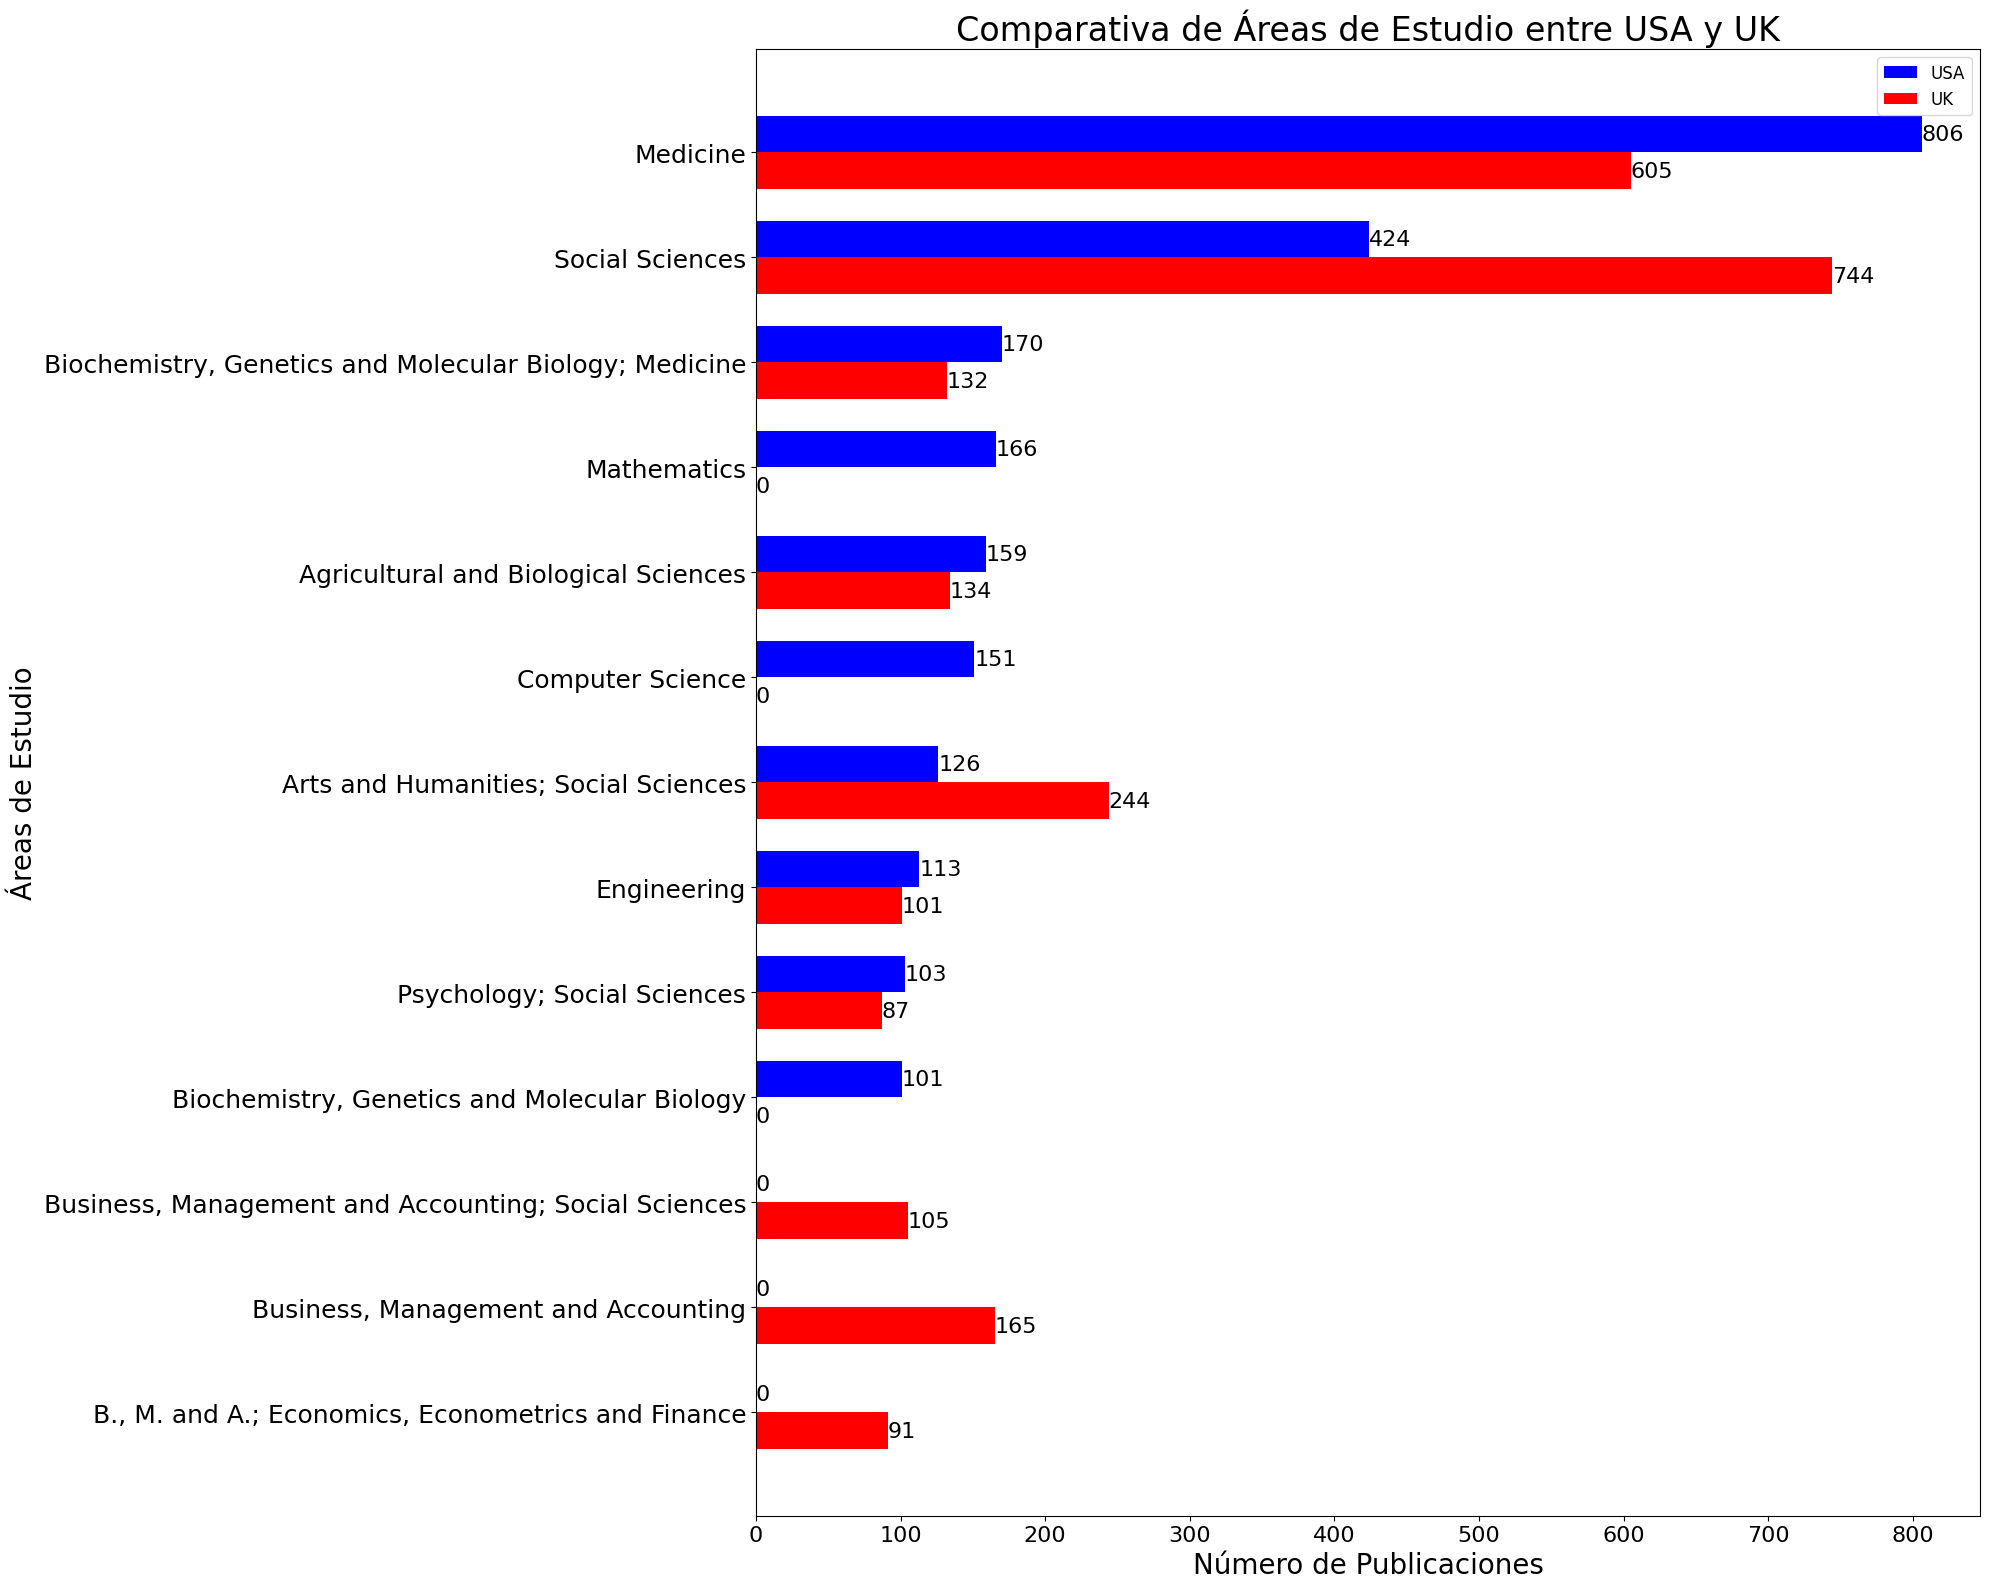

In [107]:
""" Tabla de barras en horizontal mostrando las 10 principales areas de investigación por parte de los 2 primeros paises del ranking USA y UK"""

# Definir los datos para USA y UK
areas_estudio_usa = ['Medicine', 'Social Sciences', 'Biochemistry, Genetics and Molecular Biology; Medicine',
                     'Mathematics', 'Agricultural and Biological Sciences', 'Computer Science',
                     'Arts and Humanities; Social Sciences', 'Engineering', 'Psychology; Social Sciences',
                     'Biochemistry, Genetics and Molecular Biology']
valores_usa = [806, 424, 170, 166, 159, 151, 126, 113, 103, 101]

areas_estudio_uk = ['Social Sciences', 'Medicine', 'Arts and Humanities; Social Sciences',
                    'Business, Management and Accounting', 'Agricultural and Biological Sciences',
                    'Biochemistry, Genetics and Molecular Biology; Medicine',
                    'Business, Management and Accounting; Social Sciences', 'Engineering',
                    'B., M. and A.; Economics, Econometrics and Finance',
                    'Psychology; Social Sciences']
valores_uk = [744, 605, 244, 165, 134, 132, 105, 101, 91, 87]

# Obtener todas las áreas de estudio únicas
areas_unicas = list(set(areas_estudio_usa + areas_estudio_uk))

# Ordenar las áreas únicas manteniendo el orden de las áreas específicas de cada país
areas_unicas.sort(key=lambda x: (x not in areas_estudio_usa, areas_estudio_usa.index(x) if x in areas_estudio_usa else float('inf')))

# Asignar valores cero a las áreas que no estén presentes en una de las listas
valores_usa_extendidos = [valores_usa[areas_estudio_usa.index(area)] if area in areas_estudio_usa else 0 for area in areas_unicas]
valores_uk_extendidos = [valores_uk[areas_estudio_uk.index(area)] if area in areas_estudio_uk else 0 for area in areas_unicas]

# Posiciones de las barras
posiciones = np.arange(len(areas_unicas))

# Altura de cada barra
altura_barra = 0.35

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(20, 16))
barra_usa = plt.barh(posiciones - altura_barra/2, valores_usa_extendidos, color='blue', height=altura_barra, label='USA')
barra_uk = plt.barh(posiciones + altura_barra/2, valores_uk_extendidos, color='red', height=altura_barra, label='UK')

# Añadir etiquetas con el número de publicaciones al final de cada barra
for barra in [barra_usa, barra_uk]:
    for rect in barra:
        width = rect.get_width()
        plt.text(width, rect.get_y() + rect.get_height()/2, f'{int(width)}', ha='left', va='center', fontsize=16)

# Ajustar el diseño del gráfico
plt.xlabel('Número de Publicaciones')
plt.ylabel('Áreas de Estudio')
plt.title('Comparativa de Áreas de Estudio entre USA y UK')
plt.yticks(posiciones, areas_unicas)
plt.legend()

# Mostrar el gráfico
plt.xlabel('Número de Publicaciones', fontsize=20)  # Aumentar el tamaño del texto del eje x
plt.ylabel('Áreas de Estudio', fontsize=20)  # Aumentar el tamaño del texto del eje y
plt.title('Comparativa de Áreas de Estudio entre USA y UK', fontsize=24)  # Aumentar el tamaño del título
plt.yticks(posiciones, areas_unicas, fontsize=18)  # Aumentar el tamaño del texto del eje y
plt.xticks(fontsize=16)  # Aumentar el tamaño del texto del eje x
plt.legend(fontsize=12)  # Aumentar el tamaño de la leyenda

# Mostrar el gráfico
plt.gca().invert_yaxis()  # Invertir el eje y para que el área de estudio más alta esté en la parte superior
plt.tight_layout()
plt.show()


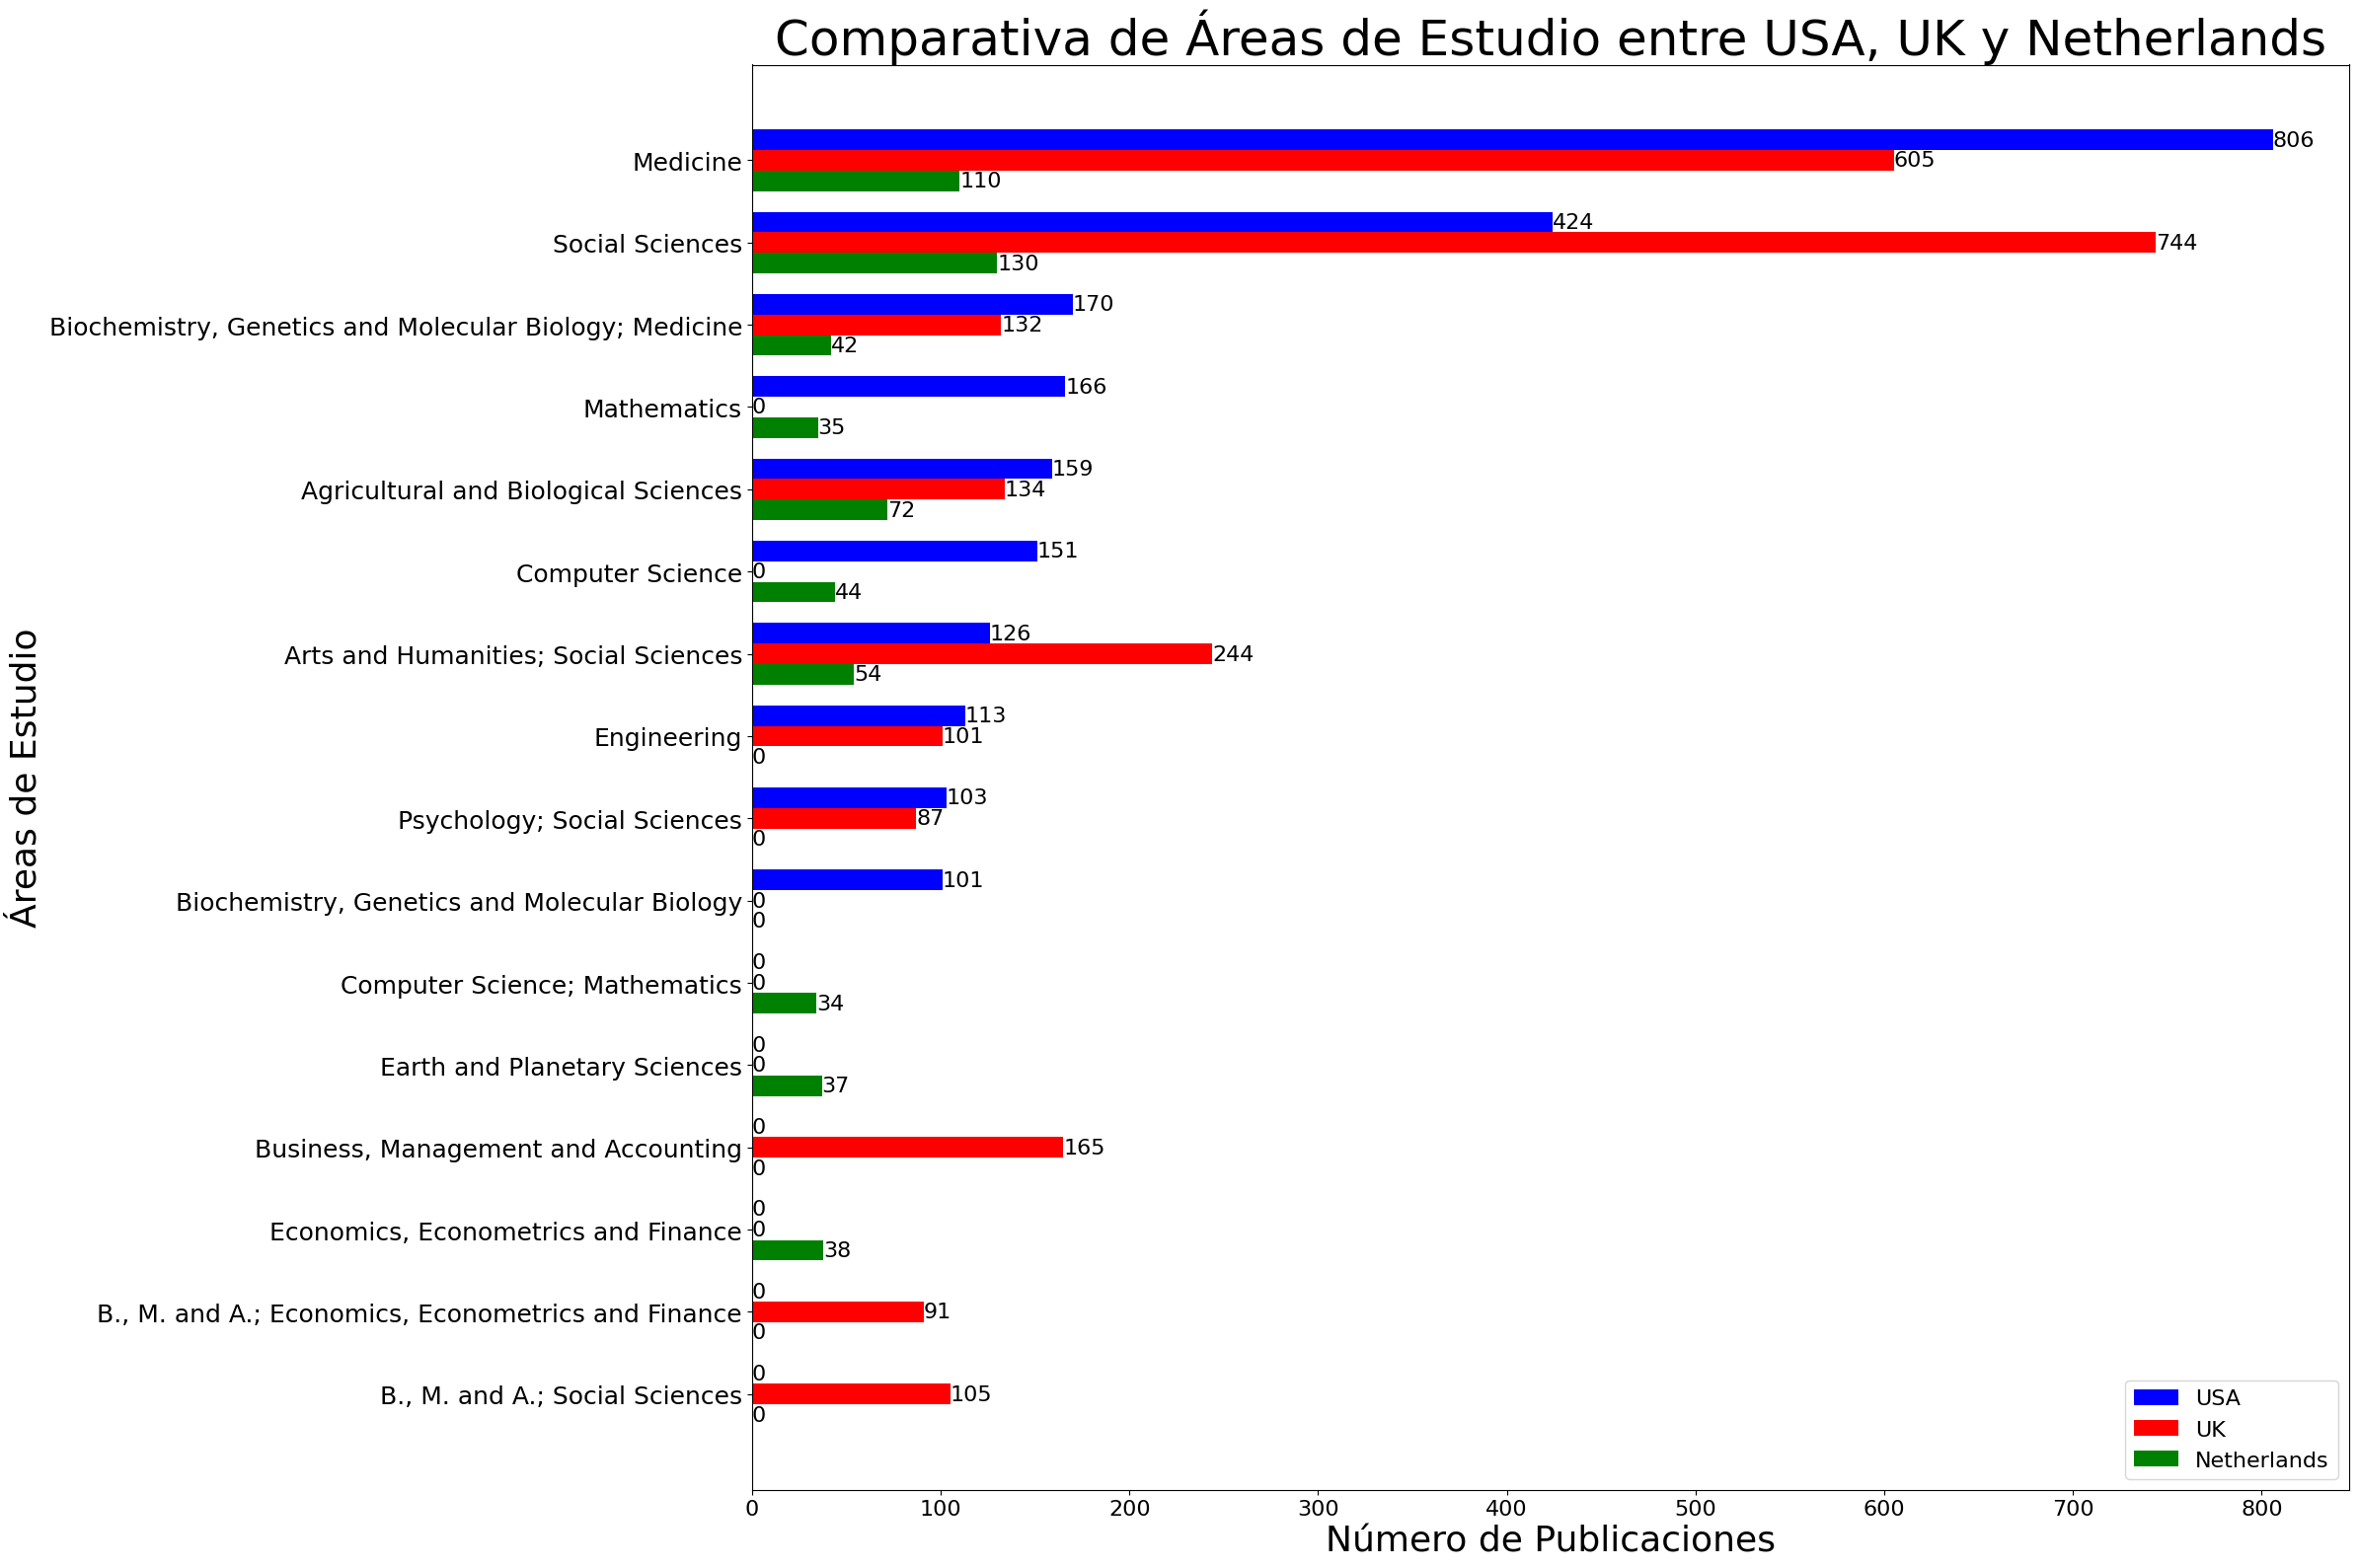

In [108]:
""" Tabla de barras en vertical mostrando las 10 principales areas de investigación por parte de los 3 primeros paises del ranking USA, UK y Netherlands. Ejemplifica que no tiene caso incluir el 3º"""


# Definir los datos para USA, UK y Netherlands
areas_estudio_usa = ['Medicine', 'Social Sciences', 'Biochemistry, Genetics and Molecular Biology; Medicine',
                     'Mathematics', 'Agricultural and Biological Sciences', 'Computer Science',
                     'Arts and Humanities; Social Sciences', 'Engineering', 'Psychology; Social Sciences',
                     'Biochemistry, Genetics and Molecular Biology']
valores_usa = [806, 424, 170, 166, 159, 151, 126, 113, 103, 101]

areas_estudio_uk = ['Social Sciences', 'Medicine', 'Arts and Humanities; Social Sciences',
                    'Business, Management and Accounting', 'Agricultural and Biological Sciences',
                    'Biochemistry, Genetics and Molecular Biology; Medicine',
                    'B., M. and A.; Social Sciences', 'Engineering',
                    'B., M. and A.; Economics, Econometrics and Finance',
                    'Psychology; Social Sciences']
valores_uk = [744, 605, 244, 165, 134, 132, 105, 101, 91, 87]

areas_estudio_netherlands = ['Social Sciences', 'Medicine', 'Agricultural and Biological Sciences',
                             'Arts and Humanities; Social Sciences', 'Computer Science',
                             'Biochemistry, Genetics and Molecular Biology; Medicine',
                             'Economics, Econometrics and Finance', 'Earth and Planetary Sciences',
                             'Mathematics', 'Computer Science; Mathematics']
valores_netherlands = [130, 110, 72, 54, 44, 42, 38, 37, 35, 34]

# Obtener todas las áreas de estudio únicas
areas_unicas = list(set(areas_estudio_usa + areas_estudio_uk + areas_estudio_netherlands))

# Ordenar las áreas únicas manteniendo el orden de las áreas específicas de cada país
areas_unicas.sort(key=lambda x: (x not in areas_estudio_usa, areas_estudio_usa.index(x) if x in areas_estudio_usa else float('inf')))

# Asignar valores cero a las áreas que no estén presentes en una de las listas
valores_usa_extendidos = [valores_usa[areas_estudio_usa.index(area)] if area in areas_estudio_usa else 0 for area in areas_unicas]
valores_uk_extendidos = [valores_uk[areas_estudio_uk.index(area)] if area in areas_estudio_uk else 0 for area in areas_unicas]
valores_netherlands_extendidos = [valores_netherlands[areas_estudio_netherlands.index(area)] if area in areas_estudio_netherlands else 0 for area in areas_unicas]

# Posiciones de las barras
posiciones = np.arange(len(areas_unicas))

# Altura de cada barra
altura_barra = 0.25

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(24, 16))
barra_usa = plt.barh(posiciones - altura_barra, valores_usa_extendidos, color='blue', height=altura_barra, label='USA')
barra_uk = plt.barh(posiciones, valores_uk_extendidos, color='red', height=altura_barra, label='UK')
barra_netherlands = plt.barh(posiciones + altura_barra, valores_netherlands_extendidos, color='green', height=altura_barra, label='Netherlands')

# Añadir etiquetas con el número de publicaciones al final de cada barra
for barra in [barra_usa, barra_uk, barra_netherlands]:
    for rect in barra:
        width = rect.get_width()
        plt.text(width, rect.get_y() + rect.get_height()/2, f'{int(width)}', ha='left', va='center', fontsize=16)

# Ajustar el diseño del gráfico
plt.xlabel('Número de Publicaciones', fontsize=26)
plt.ylabel('Áreas de Estudio', fontsize=26)
plt.title('Comparativa de Áreas de Estudio entre USA, UK y Netherlands', fontsize=36)
plt.yticks(posiciones, areas_unicas, fontsize=18)
plt.xticks(fontsize=16)
plt.legend(fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()





In [109]:
""" filtrado de palabras dentro de la columna title"""

import re

words = []
reps = []
# Función para contar la frecuencia de cada palabra en una columna
def contar_palabras(dataframe, columna):
    texto_completo = ' '.join(dataframe[columna])  # Combinar todo el texto en una sola cadena
    palabras = re.findall(r'\b\w+\b', texto_completo.lower())  # Encontrar todas las palabras
    contador_palabras = pd.Series(palabras).value_counts().to_dict()  # Contar las ocurrencias de cada palabra
    return contador_palabras

# Pedir al usuario el nombre de la columna en la que desea buscar
columna_a_buscar = input("Ingrese el nombre de la columna en la que desea buscar palabras: ")

# Contar las palabras en la columna especificada
contador_palabras = contar_palabras(df, columna_a_buscar)

# Mostrar el resultado
print("Número de repeticiones de cada palabra en la columna:")
for palabra, repeticiones in contador_palabras.items():
    words.append(palabra)
    reps.append(repeticiones)
dfw = pd.DataFrame({"words":words,
                    "reps":reps})

# Descargar las stopwords en el idioma deseado
nltk.download('stopwords')

# Cargar las stopwords en inglés (o el idioma deseado)
stop_words = set(stopwords.words('english'))

# Supongamos que tienes un DataFrame llamado df con una columna llamada "Text"

# Función para filtrar las filas del DataFrame
def filter_stopwords(row):
    words = row["words"].split()  # Dividir el texto en palabras
    for word in words:
        if word.lower() in stop_words:  # Verificar si la palabra está en las stopwords
            return False  # No mantener la fila si se encuentra una stopword
    return True  # Mantener la fila si no se encuentran stopwords

# Aplicar la función de filtrado a cada fila del DataFrame
filtered_df = dfw[dfw.apply(lambda row: filter_stopwords(row), axis=1)]

# Mostrar el DataFrame filtrado
print(filtered_df)
filtered_df = filtered_df.iloc[1:,:]

KeyError: ''

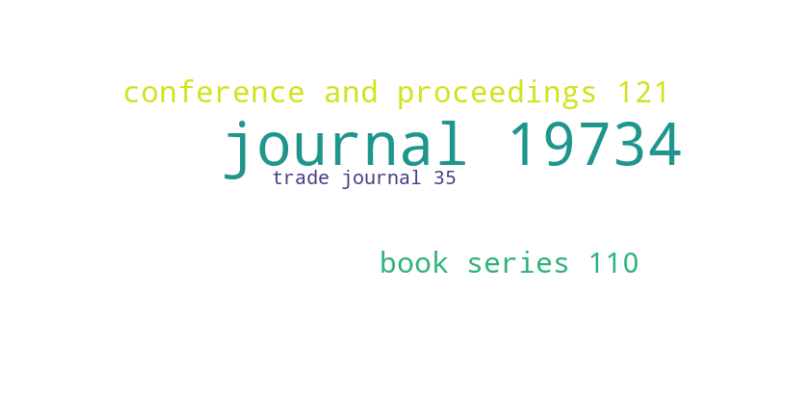

In [ ]:

# Definir los valores y etiquetas
valores = {'journal 19734': 19734, 'conference and proceedings 121': 121, 'book series 110': 110, 'trade journal 35': 35}

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(valores)

# Mostrar el gráfico de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

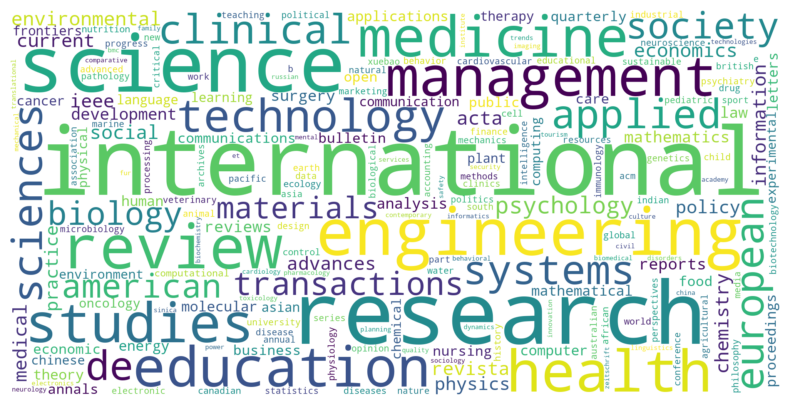

In [ ]:

dicc = filtered_df.set_index("words")["reps"].to_dict()

# Definir los valores y etiquetas
valores = dicc

# Crear el objeto WordCloud
wordcloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(valores)

# Mostrar el gráfico de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df_cit = df.loc[df.loc[:,"Cites / Doc. (2years)"].sort_values(ascending=False).index][0:5000]

In [ ]:
df_refD = df.loc[df.loc[:,"Ref. / Doc."].sort_values(ascending=False).index][0:5000]

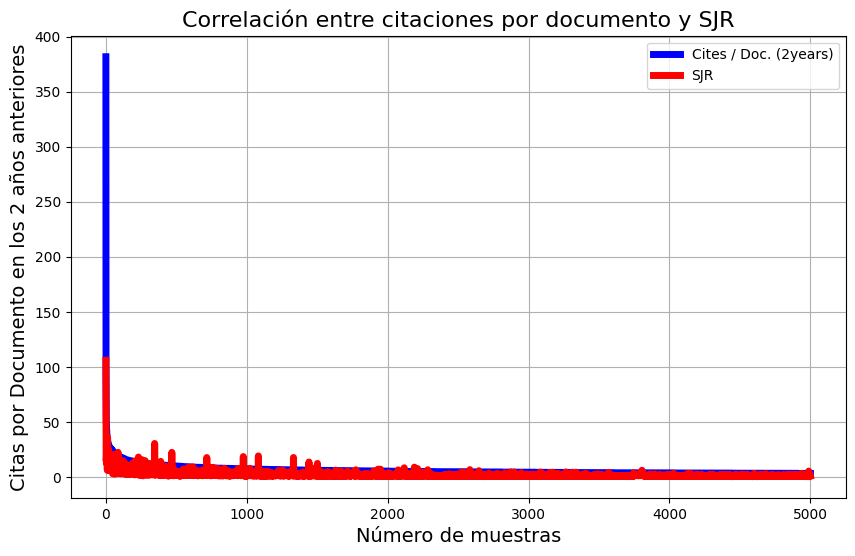

In [110]:
""" comportamiento y magnitud comparativa enter SJR y H index"""

# Generar 20000 muestras de valores para la primera variable
muestras = 5000
valores_1 = df_cit.loc[:,"Cites / Doc. (2years)"]

# Generar 20000 muestras de valores para la segunda variable
valores_2 = df_cit.loc[:,"SJR"]

# Crear una lista de índices para las muestras
indices = np.arange(1, muestras + 1)

# Crear el gráfico de línea con ambas variables
plt.figure(figsize=(10, 6))
plt.plot(indices, valores_1, color='blue', linewidth=5, label='Cites / Doc. (2years)')
plt.plot(indices, valores_2, color='red', linewidth=5, label='SJR')

# Título y etiquetas de los ejes
plt.title('Correlación entre citaciones por documento y SJR', fontsize=16)
plt.xlabel('Número de muestras', fontsize=14)
plt.ylabel('Citas por Documento en los 2 años anteriores', fontsize=14)

plt.grid(True)  # Agregar cuadrícula al gráfico
plt.legend()    # Mostrar la leyenda
plt.show()


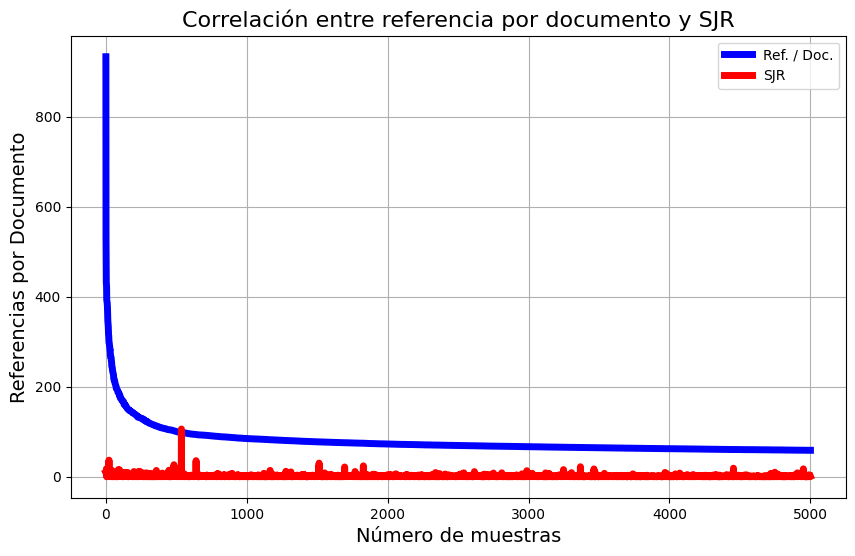

In [111]:
""" comportamiento y magnitud comparativa enter SJR y H index"""

muestras = 5000
valores_1 = df_refD.loc[:,"Ref. / Doc."]

valores_2 = df_refD.loc[:,"SJR"]

# Crear una lista de índices para las muestras
indices = np.arange(1, muestras + 1)

# Crear el gráfico de línea con ambas variables
plt.figure(figsize=(10, 6))
plt.plot(indices, valores_1, color='blue', linewidth=5, label='Ref. / Doc.')
plt.plot(indices, valores_2, color='red', linewidth=5, label='SJR')

# Título y etiquetas de los ejes
plt.title('Correlación entre referencia por documento y SJR', fontsize=16)
plt.xlabel('Número de muestras', fontsize=14)
plt.ylabel('Referencias por Documento', fontsize=14)

plt.grid(True)  # Agregar cuadrícula al gráfico
plt.legend()    # Mostrar la leyenda
plt.show()


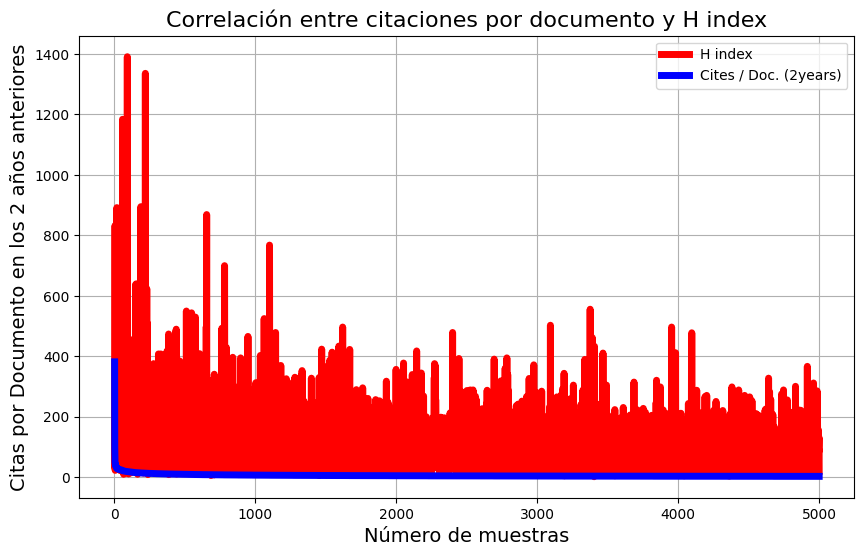

In [112]:
""" comportamiento y magnitud comparativa enter SJR y H index"""

muestras = 5000
valores_2 = df_cit.loc[:,"H index"]

valores_1 = df_cit.loc[:,"Cites / Doc. (2years)"]

valores_2 = df_cit.loc[:,"H index"]

# Crear una lista de índices para las muestras
indices = np.arange(1, muestras + 1)

# Crear el gráfico de línea con ambas variables
plt.figure(figsize=(10, 6))
plt.plot(indices, valores_2, color='red', linewidth=5, label='H index')

plt.plot(indices, valores_1, color='blue', linewidth=5, label='Cites / Doc. (2years)')

# Título y etiquetas de los ejes
plt.title('Correlación entre citaciones por documento y H index', fontsize=16)
plt.xlabel('Número de muestras', fontsize=14)
plt.ylabel('Citas por Documento en los 2 años anteriores', fontsize=14)

plt.grid(True)  # Agregar cuadrícula al gráfico
plt.legend()    # Mostrar la leyenda
plt.show()


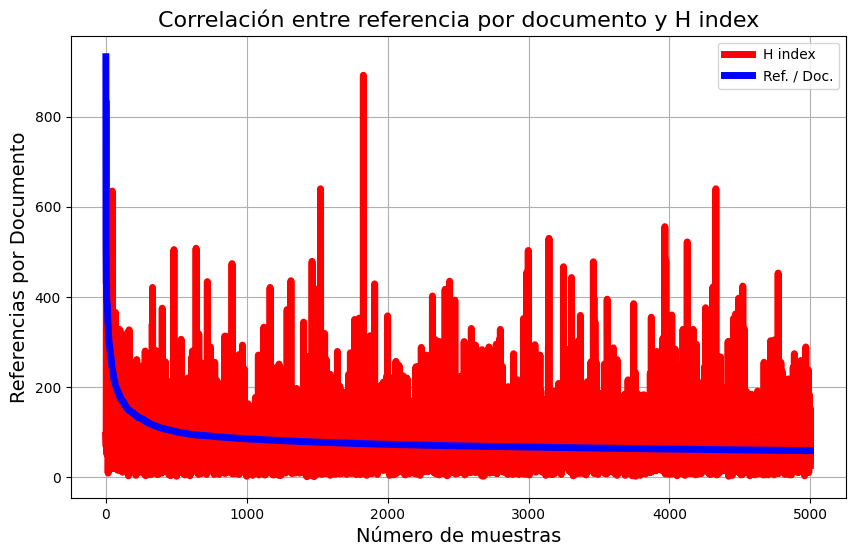

In [113]:
""" comportamiento y magnitud comparativa enter SJR y H index"""

muestras = 5000
valores_1 = df_refD.loc[:,"Ref. / Doc."]

valores_2 = df_refD.loc[:,"H index"]

# Crear una lista de índices para las muestras
indices = np.arange(1, muestras + 1)

# Crear el gráfico de línea con ambas variables
plt.figure(figsize=(10, 6))
plt.plot(indices, valores_2, color='red', linewidth=5, label='H index')

plt.plot(indices, valores_1, color='blue', linewidth=5, label='Ref. / Doc.')

# Título y etiquetas de los ejes
plt.title('Correlación entre referencia por documento y H index', fontsize=16)
plt.xlabel('Número de muestras', fontsize=14)
plt.ylabel('Referencias por Documento', fontsize=14)

plt.grid(True)  # Agregar cuadrícula al gráfico
plt.legend()    # Mostrar la leyenda
plt.show()


In [114]:

dfP = df.loc[:,"Publisher"].value_counts()[0:20]
dfP

Publisher
Taylor and Francis Ltd.                                   1182
Elsevier B.V.                                             1043
Routledge                                                  611
SAGE Publications Inc.                                     484
Wiley-Blackwell Publishing Ltd                             472
Elsevier Ltd                                               451
SAGE Publications Ltd                                      374
Springer Netherlands                                       368
Oxford University Press                                    363
Elsevier Inc.                                              316
Emerald Group Publishing Ltd.                              310
Cambridge University Press                                 298
Wiley-Blackwell                                            294
Springer Verlag                                            285
Springer New York                                          284
John Wiley &amp; Sons Inc.                   

In [115]:
dfP.index.to_list()

['Taylor and Francis Ltd.',
 'Elsevier B.V.',
 'Routledge',
 'SAGE Publications Inc.',
 'Wiley-Blackwell Publishing Ltd',
 'Elsevier Ltd',
 'SAGE Publications Ltd',
 'Springer Netherlands',
 'Oxford University Press',
 'Elsevier Inc.',
 'Emerald Group Publishing Ltd.',
 'Cambridge University Press',
 'Wiley-Blackwell',
 'Springer Verlag',
 'Springer New York',
 'John Wiley &amp; Sons Inc.',
 'BioMed Central Ltd',
 'Multidisciplinary Digital Publishing Institute (MDPI)',
 'Institute of Electrical and Electronics Engineers Inc.',
 'Lippincott Williams and Wilkins Ltd.']

C:\Users\Victor\AppData\Local\Temp\ipykernel_26020\2281159000.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=df_Spm.loc[:,"SJR"].sort_values(ascending= False).head(20).index,
C:\Users\Victor\AppData\Local\Temp\ipykernel_26020\2281159000.py:17: UserWarning: The palette list has more values (30) than needed (20), which may not be intended.
  barplot = sns.barplot(x=df_Spm.loc[:,"SJR"].sort_values(ascending= False).head(20).index,


Text(0.5, 1.0, 'Top 20 Publicador en base a su media de SJR')

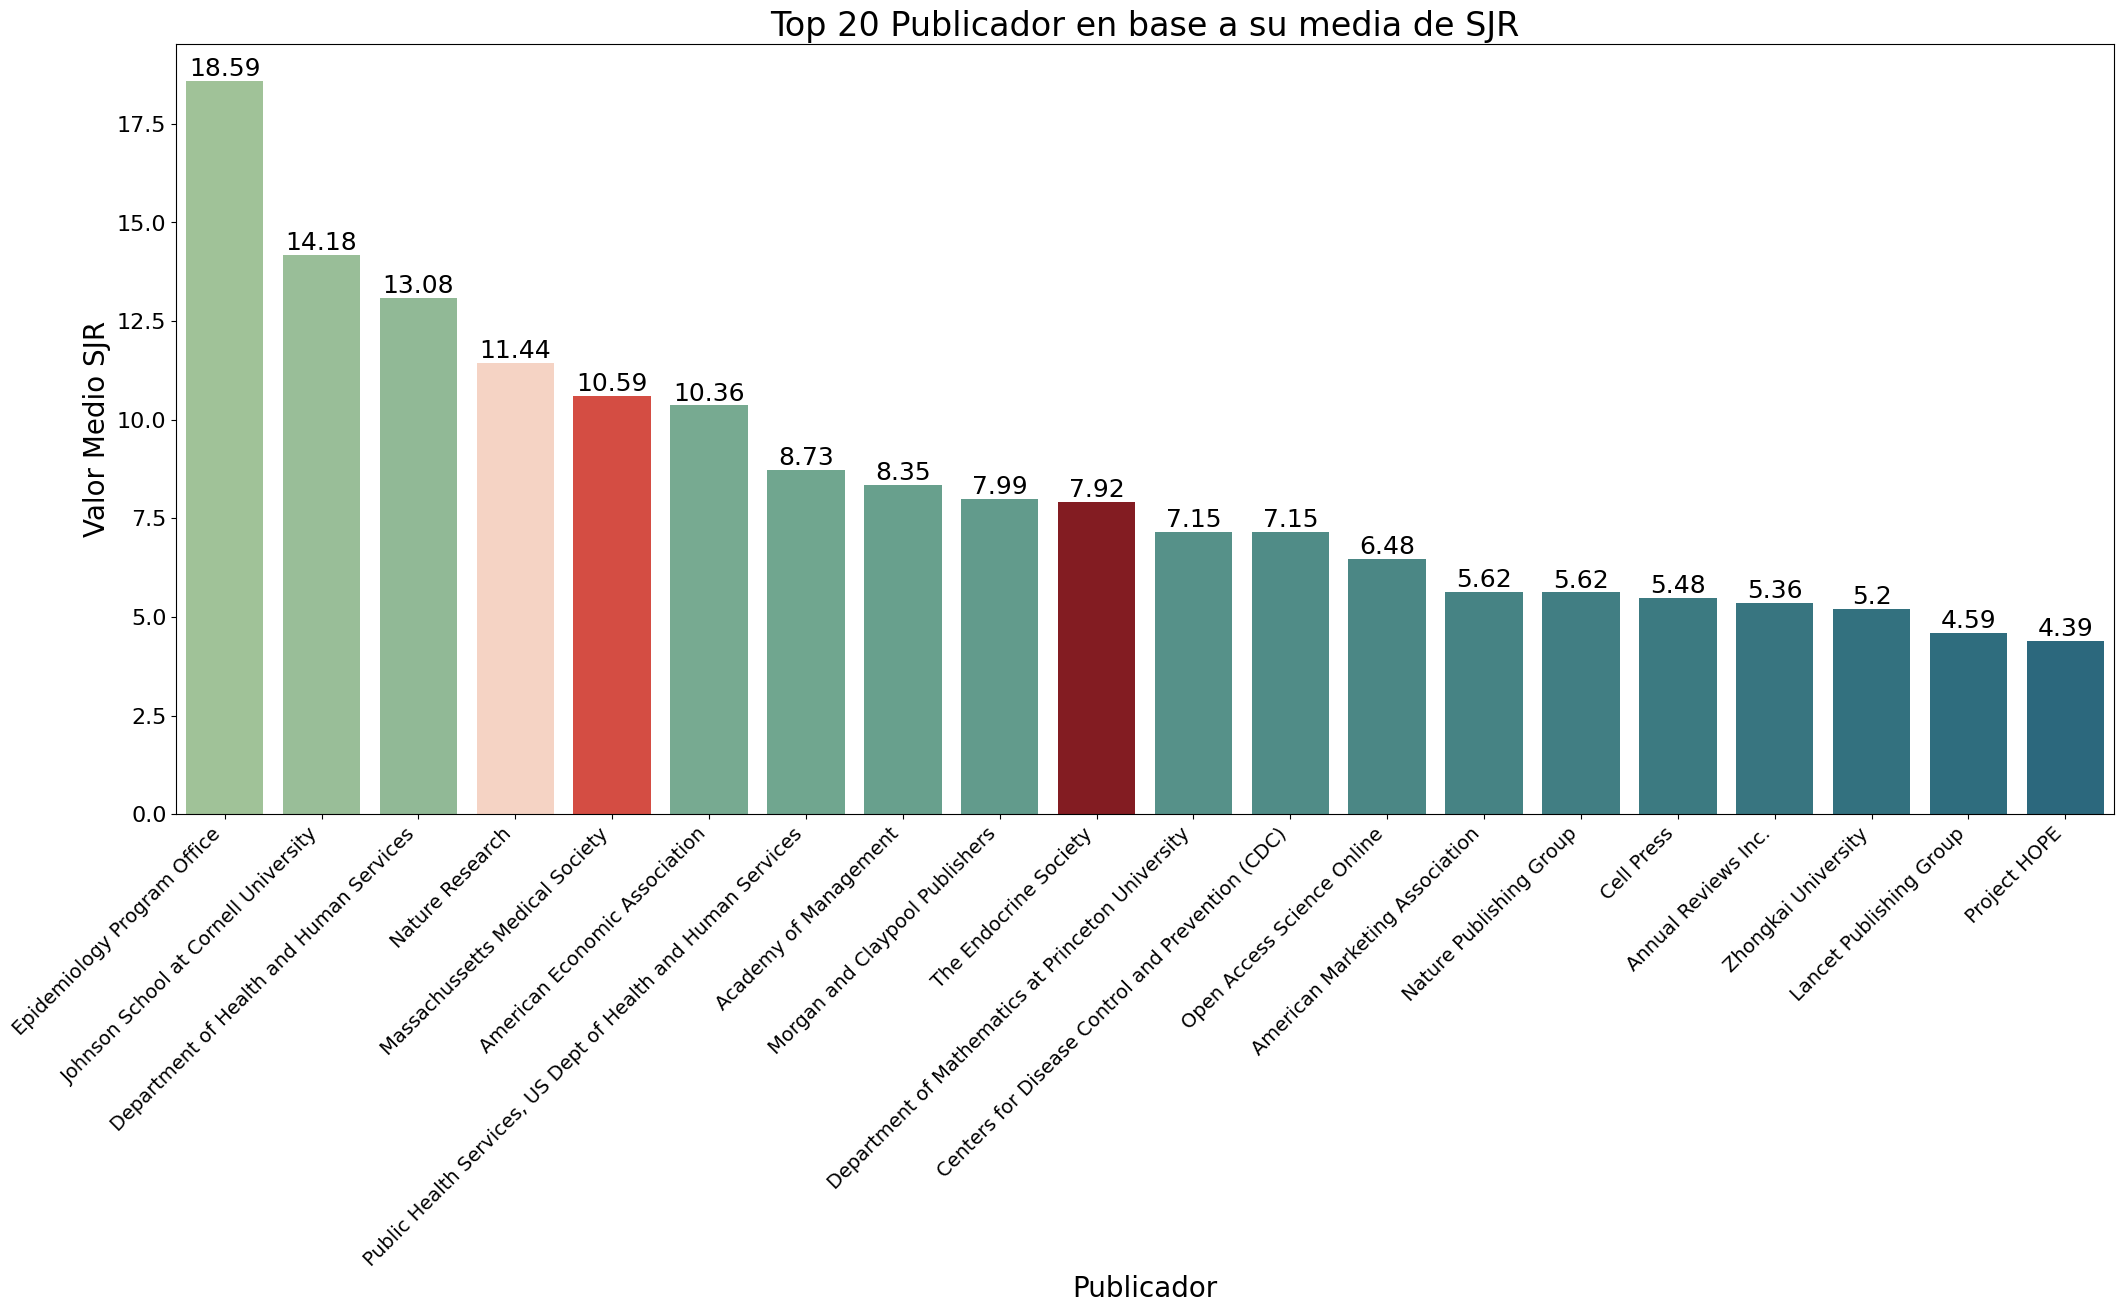

In [116]:
# Crear el gráfico de barras
plt.figure(figsize=(25,10))  # Tamaño ajustado

# Colores progresivos de rojo a verde a azul
colors = sns.color_palette("crest", 30)
red_color3 = sns.color_palette("Reds", 10)[1]  
red_color1 = sns.color_palette("Reds", 10)[6]  
red_color2 = sns.color_palette("Reds", 10)[9]  


colors[3] = red_color3  
colors[4] = red_color1  
colors[9] = red_color2 



barplot = sns.barplot(x=df_Spm.loc[:,"SJR"].sort_values(ascending= False).head(20).index,
                      y=df_Spm.loc[:,"SJR"].sort_values(ascending= False).head(20),
                      palette=colors)

# Añadir etiquetas en la parte superior de cada columna
for index, value in enumerate(df_Spm.loc[:,"SJR"].sort_values(ascending= False).head(20)):
    barplot.text(index, value, str(round(value,2)), ha='center', fontsize=18, va='bottom')

# Ajustar el tamaño y la inclinación del texto del eje x y y
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=16)

# Etiquetas del eje x y y
plt.xlabel("Publicador", fontsize=20)
plt.ylabel("Valor Medio SJR", fontsize=20)

# Título
plt.title("Top 20 Publicador en base a su media de SJR", fontsize=24)


C:\Users\Victor\AppData\Local\Temp\ipykernel_26020\522943280.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=df_Hpm.loc[:,"H index"].sort_values(ascending= False).head(20).index,
C:\Users\Victor\AppData\Local\Temp\ipykernel_26020\522943280.py:16: UserWarning: The palette list has more values (30) than needed (20), which may not be intended.
  barplot = sns.barplot(x=df_Hpm.loc[:,"H index"].sort_values(ascending= False).head(20).index,


Text(0.5, 1.0, 'Top 20 Publicadores en base a su media de H index')

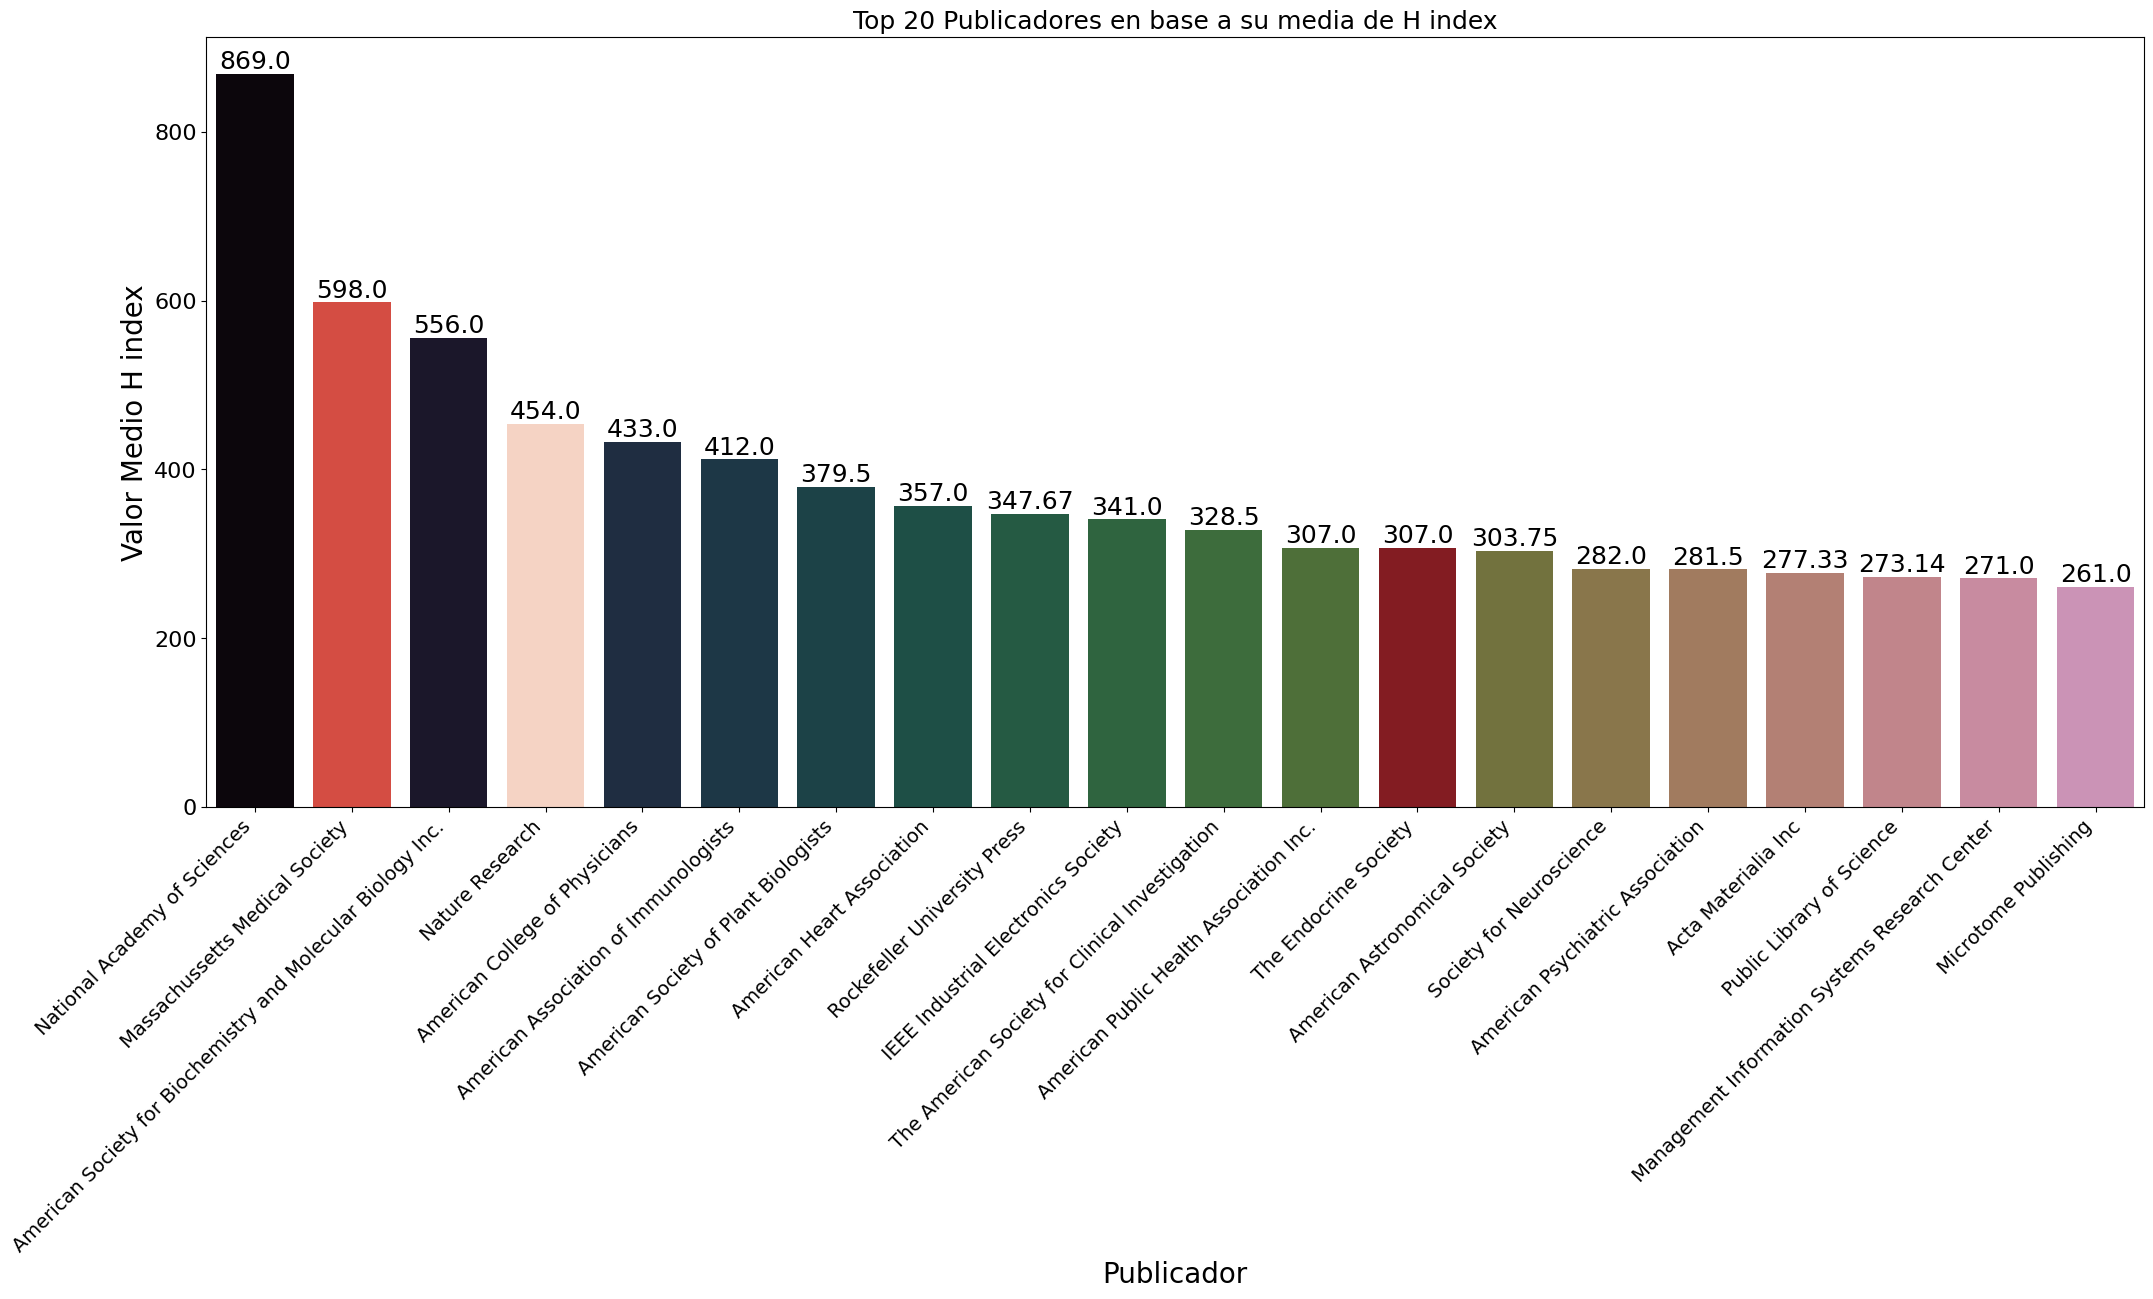

In [117]:
# Crear el gráfico de barras
plt.figure(figsize=(25,10))  # Tamaño ajustado

# Colores progresivos de rojo a verde a azul
colors = sns.color_palette("cubehelix", 30)
red_color = sns.color_palette("Reds", 10)[1]  
red_color1 = sns.color_palette("Reds", 10)[6]  
red_color2 = sns.color_palette("Reds", 10)[9]  


colors[3] = red_color  
colors[1] = red_color1 
colors[12] = red_color2 


barplot = sns.barplot(x=df_Hpm.loc[:,"H index"].sort_values(ascending= False).head(20).index,
                      y=df_Hpm.loc[:,"H index"].sort_values(ascending= False).head(20),
                      palette=colors)

# Añadir etiquetas en la parte superior de cada columna
for index, value in enumerate(df_Hpm.loc[:,"H index"].sort_values(ascending= False).head(20)):
    barplot.text(index, value, str(round(value,2)), ha='center', fontsize=18, va='bottom')

# Ajustar el tamaño y la inclinación del texto del eje x y y
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=16)

# Etiquetas del eje x y y
plt.xlabel("Publicador", fontsize=20)
plt.ylabel("Valor Medio H index", fontsize=20)

# Título
plt.title("Top 20 Publicadores en base a su media de H index", fontsize=18)


C:\Users\Victor\AppData\Local\Temp\ipykernel_26020\3970086276.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=dfP.index.to_list(),
C:\Users\Victor\AppData\Local\Temp\ipykernel_26020\3970086276.py:9: UserWarning: The palette list has more values (30) than needed (20), which may not be intended.
  barplot = sns.barplot(x=dfP.index.to_list(),


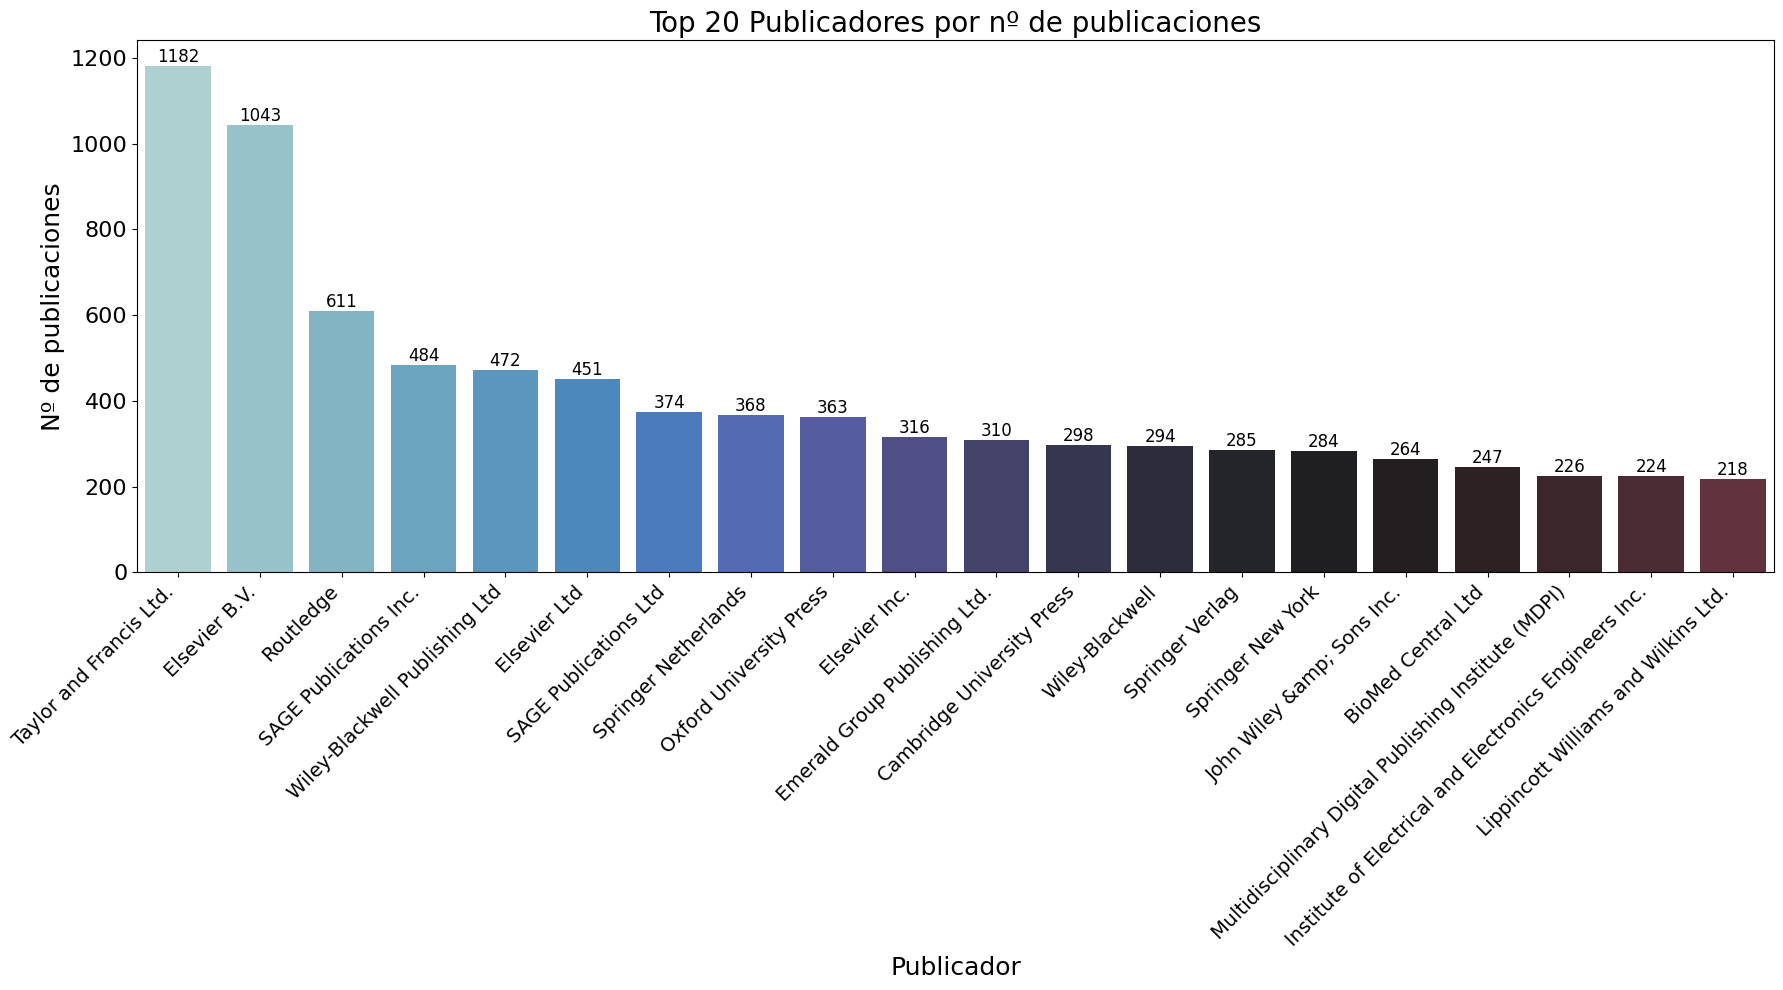

In [118]:
# Crear el gráfico de barras
plt.figure(figsize=(18,10))  # Tamaño ajustado

# Colores progresivos de rojo a verde a azul
colors1 = sns.color_palette("icefire", 30)
colors2 = sns.color_palette("rocket", 10)


barplot = sns.barplot(x=dfP.index.to_list(),
                      y=dfP.to_list(),
                      palette=colors1)

# barplot = sns.barplot(x=states,
#                       y=dfCM1.to_list(),
#                       palette=colors2,
#                       alpha = 0.5)

# Añadir etiquetas en la parte superior de cada columna
for index, value in enumerate(dfP.to_list()):
    barplot.text(index, value, str(round(value,2)), ha='center', fontsize=12, va='bottom')

# # Añadir etiquetas en la parte superior de cada columna
# for index, value in enumerate(dfCM1.to_list()):
#     barplot.text(index, value, f'H index: {str(round(value,2))}', ha='center', fontsize=12, va='bottom')

# Ajustar el tamaño y la inclinación del texto del eje x y y
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=16)

# Etiquetas del eje x y y
plt.xlabel("Publicador", fontsize=18)
plt.ylabel("Nº de publicaciones", fontsize=18)

# Título
plt.title("Top 20 Publicadores por nº de publicaciones", fontsize=20)

plt.tight_layout()  # Ajuste automático de diseño
plt.show()


In [119]:
df.groupby("Publisher")[["SJR"]].mean()

,SJR
Publisher,
"4S go, s.r.o",0.230000
A and V Publication,0.270000
A.D.A.C.,0.513333
A.N.Severtsov Institute of Ecology and Evolution of RAS,0.270000
A.O. Kovalevsky Institute of Biology of the Southern Seas of RAS,0.230000
...,...
idd3,0.260000
li xue jin zhan bian ji bu,0.430000
shi you yu tian ran qi di zhi bian ji bu,1.720000


In [120]:
df_Spm = df.groupby("Publisher")[["SJR"]].mean()
df_Hpm = df.groupby("Publisher")[["H index"]].mean()
dfPS = df_Spm.loc[:,"SJR"].sort_values(ascending= False)
dfPH = df_Hpm.loc[:,"H index"].sort_values(ascending=False)


In [121]:
df_inner1 = pd.merge(dfP[0:130], dfPH[0:130], on='Publisher', how='inner')
df_inner1


,count,H index
Publisher,,
Elsevier Ltd,451,118.133038


In [122]:
df_inner2 = pd.merge(dfP[0:128], dfPS[0:128], on='Publisher', how='inner')
df_inner2


,count,SJR
Publisher,,
Elsevier Ltd,451,1.626652


In [123]:
df_inner3 = pd.merge(dfPS[0:20], dfPH[0:20], on='Publisher', how='inner')
df_inner3


,SJR,H index
Publisher,,
Nature Research,11.441667,454.0
Massachussetts Medical Society,10.595000,598.0
The Endocrine Society,7.920000,307.0


In [124]:
df.loc[df.loc[:,"Publisher"]=="Nature Research",:]

,Rank,Sourceid,Title,Type,SJR,SJR Best Quartile,H index,Total Docs. (2023),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,Areas
12,13,15819,Nature Medicine,journal,19.05,Q1,630,595,1363,16478,36243,729,27.3,27.9,United Kingdom,Western Europe,Nature Research,1995-2023,"Biochemistry, Genetics and Molecular Biology (...","Biochemistry, Genetics and Molecular Biology; ..."
16,17,21206,Nature,journal,18.51,Q1,1391,3770,8037,74917,160102,3840,19.0,19.7,United Kingdom,Western Europe,Nature Research,1869-2023,Multidisciplinary (Q1),Multidisciplinary
51,52,17436,Nature Neuroscience,journal,12.26,Q1,479,281,622,12439,10101,497,14.3,44.7,United Kingdom,Western Europe,Nature Research,1998-2023,Neuroscience (miscellaneous) (Q1),Neuroscience
56,57,21101023100,Nature Cancer,journal,11.90,Q1,61,176,453,7513,5933,297,12.7,42.9,United States,Northern America,Nature Research,2020-2023,Cancer Research (Q1); Oncology (Q1),"Biochemistry, Genetics and Molecular Biology; ..."
270,271,21100416121,Nature Plants,journal,5.13,Q1,131,274,686,10476,6409,444,8.7,38.3,United Kingdom,Western Europe,Nature Research,"2010, 2015-2023",Plant Science (Q1),Agricultural and Biological Sciences
1642,1643,21100870831,npj Aging and Mechanisms of Disease,journal,1.80,Q1,32,0,40,0,231,40,5.7,0.0,United Kingdom,Western Europe,Nature Research,2015-2021,Aging (Q1); Geriatrics and Gerontology (Q1),"Biochemistry, Genetics and Molecular Biology; ..."


In [125]:
df.loc[df.loc[:,"Publisher"]=="Massachussetts Medical Society",:]

,Rank,Sourceid,Title,Type,SJR,SJR Best Quartile,H index,Total Docs. (2023),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,Areas
10,11,15847,New England Journal of Medicine,journal,20.54,Q1,1184,1388,4522,14603,107246,1824,21.9,10.2,United States,Northern America,Massachussetts Medical Society,1945-2023,Medicine (miscellaneous) (Q1),Medicine
8125,8126,21101150071,NEJM Catalyst Innovations in Care Delivery,journal,0.65,Q1,12,115,250,2279,356,231,1.2,19.2,United States,Northern America,Massachussetts Medical Society,2020-2023,Leadership and Management (Q1); Health Informa...,Medicine; Nursing


In [126]:
df.loc[df.loc[:,"Publisher"]=="The Endocrine Society",:]

,Rank,Sourceid,Title,Type,SJR,SJR Best Quartile,H index,Total Docs. (2023),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,Areas
122,123,26038,Endocrine Reviews,journal,7.92,Q1,307,40,95,7025,2339,95,22.7,175.3,United States,Northern America,The Endocrine Society,1980-2023,"Endocrinology (Q1); Endocrinology, Diabetes an...","Biochemistry, Genetics and Molecular Biology; ..."


In [127]:
df.loc[df.loc[:,"Publisher"]=="Taylor and Francis Ltd.",:]

,Rank,Sourceid,Title,Type,SJR,SJR Best Quartile,H index,Total Docs. (2023),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,Areas
31,32,26978,Advances in Physics,journal,14.78,Q1,123,0,13,0,374,11,12.6,0.0,United Kingdom,Western Europe,Taylor and Francis Ltd.,"1952-2021, 2023",Condensed Matter Physics (Q1),Physics and Astronomy
354,355,5100155099,Qualitative Research in Psychology,journal,4.39,Q1,52,33,115,1852,1779,112,21.2,56.2,United Kingdom,Western Europe,Taylor and Francis Ltd.,2004-2023,Psychology (miscellaneous) (Q1),Psychology
413,414,12094,Journal of the American Statistical Association,journal,3.92,Q1,215,296,566,13000,2339,516,3.8,43.2,United Kingdom,Western Europe,Taylor and Francis Ltd.,1922-2023,"Statistics and Probability (Q1); Statistics, P...",Decision Sciences; Mathematics
428,429,15074,European Journal of Information Systems,journal,3.82,Q1,128,89,121,8012,1961,109,12.9,90.2,United Kingdom,Western Europe,Taylor and Francis Ltd.,1995-2023,Information Systems (Q1); Information Systems ...,"Business, Management and Accounting; Computer ..."
525,526,27162,Journal of Business and Economic Statistics,journal,3.39,Q1,118,108,336,4683,1026,312,2.6,43.6,United Kingdom,Western Europe,Taylor and Francis Ltd.,1983-2023,Economics and Econometrics (Q1); Social Scienc...,"Decision Sciences; Economics, Econometrics and..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19966,19967,21100792560,Law and Financial Markets Review,journal,0.20,Q3,10,7,50,0,38,46,0.2,0.0,United Kingdom,Western Europe,Taylor and Francis Ltd.,"2007, 2014-2023",Law (Q3); Finance (Q4),"Economics, Econometrics and Finance; Social Sc..."
19979,19980,16030,Seventeenth Century,journal,0.20,Q1,16,56,120,2975,40,117,0.2,53.3,United Kingdom,Western Europe,Taylor and Francis Ltd.,1986-2023,History (Q1); Cultural Studies (Q2),Arts and Humanities; Social Sciences
19980,19981,19900191827,"Sikh Formations: Religion, Culture, Theory",journal,0.20,Q1,15,35,74,1120,37,69,0.7,32.0,United Kingdom,Western Europe,Taylor and Francis Ltd.,2005-2023,Religious Studies (Q1); Cultural Studies (Q2),Arts and Humanities; Social Sciences
19987,19988,4700152767,Textile: The Journal of Cloth and Culture,journal,0.20,Q2,13,77,106,2238,34,91,0.4,29.6,United Kingdom,Western Europe,Taylor and Francis Ltd.,2006-2023,Arts and Humanities (miscellaneous) (Q2),Arts and Humanities
